<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neural-Network-Classifier" data-toc-modified-id="Neural-Network-Classifier-1">Neural Network Classifier</a></span></li><li><span><a href="#Apply-NeuralNetworkClassifier-to-Handwritten-Digits" data-toc-modified-id="Apply-NeuralNetworkClassifier-to-Handwritten-Digits-2">Apply <code>NeuralNetworkClassifier</code> to Handwritten Digits</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-3">Experiments</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-4">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-5">Extra Credit</a></span></li></ul></div>

# Neural Network Classifier

You may start with your `NeuralNetwork` class from A2, or start with the [implementation defined here](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A2solution.tar) in which all functions meant be called by other functions in this class start with an underscore character. Implement the subclass `NeuralNetworkClassifier` that extends `NeuralNetwork` as discussed in class.  Your `NeuralNetworkClassifier` implementation should rely on inheriting functions from `NeuralNetwork` as much as possible. 

Your `neuralnetworks.py` file (notice it is plural) will now contain two classes, `NeuralNetwork` and `NeuralNetworkClassifier`.

In `NeuralNetworkClassifier` replace the `error_f` function with one called `_neg_log_likelihood_f` and pass it instead of `error_f` into the optimization functions.

Here are some example tests.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import neuralnetworks as nn
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([[0], [1], [1], [0]])
X, T

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [4]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [5]:
print(nnet)

NeuralNetwork(2, [10], 2)


In [6]:
nnet.Ws

[array([[0.35343662, 0.09761247, 0.25175879, 0.4441339 , 0.17050614,
         0.08611927, 0.01297787, 0.24261672, 0.1378032 , 0.19494589],
        [0.57198811, 0.13725143, 0.0468766 , 0.38659388, 0.35867477,
         0.15834035, 0.26917306, 0.06833965, 0.04269942, 0.52006221],
        [0.4583945 , 0.48530311, 0.47066025, 0.57212805, 0.3332892 ,
         0.46982855, 0.24324799, 0.01584709, 0.26219591, 0.06081004]]),
 array([[0.24640112, 0.21037283],
        [0.17043996, 0.08268264],
        [0.30105116, 0.04162125],
        [0.18555481, 0.14624395],
        [0.12212025, 0.21945476],
        [0.09733206, 0.12076903],
        [0.09617199, 0.28559813],
        [0.27700099, 0.24538331],
        [0.01027463, 0.28443762],
        [0.28656819, 0.24319635],
        [0.14511079, 0.29148887]])]

The `softmax` function can produce errors if the denominator is close to zero.  Here is an implentation you may use to avoid some of those errors.  This assumes you have the following import in your `neuralnetworks.py` file.

`sys.float_info.epsilon` is also useful in your `_neg_log_likehood_f` function to avoid taking the `log` of zero.

In [7]:
import sys # for sys.float_info.epsilon

In [8]:
def _softmax(self, Y):
        '''Apply to final layer weighted sum outputs'''
        # Trick to avoid overflow
        maxY = Y.max()       
        expY = np.exp(Y - maxY)
        denom = expY.sum(1).reshape((-1, 1))
        Y = expY / (denom + sys.float_info.epsilon)
        return Y

Replace the `error_f` function with `neg_log_likelihood`.  If you add some print statements in `_neg_log_likelihood` functions, you can compare your output to the following results.

In [9]:
nnet.train(X, T, n_epochs=1, method='sgd', learning_rate=0.01)

sgd: Epoch 1 ObjectiveF=0.70718


NeuralNetwork(2, [10], 2)

In [10]:
print(nnet)

NeuralNetwork(2, [10], 2)
 Trained for 1 epochs.
 Final standardized training error 0.7072.


Now if you comment out those print statements, you can run for more epochs without tons of output.

In [11]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [12]:
nnet.train(X, T, 100, method='scg')

SCG: Epoch 10 ObjectiveF=0.99632
SCG: Epoch 20 ObjectiveF=0.99996
SCG: Epoch 30 ObjectiveF=1.00000


NeuralNetwork(2, [10], 2)

The `use()` function returns two `numpy` arrays. The first one are the class predictions for eachs sample, containing values from the set of unique values in `T` passed into the `train()` function.

The second value are the probabilities of each class for each sample. This should a column for each unique value in `T`.

In [13]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]]),
 array([[9.99999991e-01, 9.37898976e-09],
        [1.13199414e-08, 9.99999989e-01],
        [8.63038392e-09, 9.99999991e-01],
        [9.99999990e-01, 9.87609304e-09]]))

In [14]:
def percent_correct(Y, T):
    return np.mean(T == Y) * 100

In [15]:
percent_correct(nnet.use(X)[0], T)

100.0

Works!  The XOR problem was used early in the history of neural networks as a problem that cannot be solved with a linear model.  Let's try it.  It turns out our neural network code can do this if we use an empty list for the hidden unit structure!

In [16]:
nnet = nn.NeuralNetworkClassifier(2, [], 2)
nnet.train(X, T, 100, method='scg')

NeuralNetwork(2, [], 2)

In [17]:
nnet.use(X)

(array([[0],
        [1],
        [0],
        [1]]),
 array([[0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]))

In [18]:
percent_correct(nnet.use(X)[0], T)

50.0

A second way to evaluate a classifier is to calculate a confusion matrix. This shows the percent accuracy for each class, and also shows which classes are predicted in error.

Here is a function you can use to show a confusion matrix.

In [19]:
import pandas

def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    # cf.style.background_gradient(cmap='Blues').format("{:.1f} %")
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

In [20]:
confusion_matrix(nnet.use(X)[0], T)

Percent Correct


# Apply `NeuralNetworkClassifier` to Handwritten Digits

Apply your `NeuralNetworkClassifier` to the [MNIST digits dataset](https://www.cs.colostate.edu/~anderson/cs545/notebooks/mnist.pkl.gz).

In [21]:
import pickle
import gzip
import matplotlib.pyplot as plt

In [22]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [23]:
28*28

784

In [24]:
def draw_image(image, label):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(label)

<IPython.core.display.Javascript object>


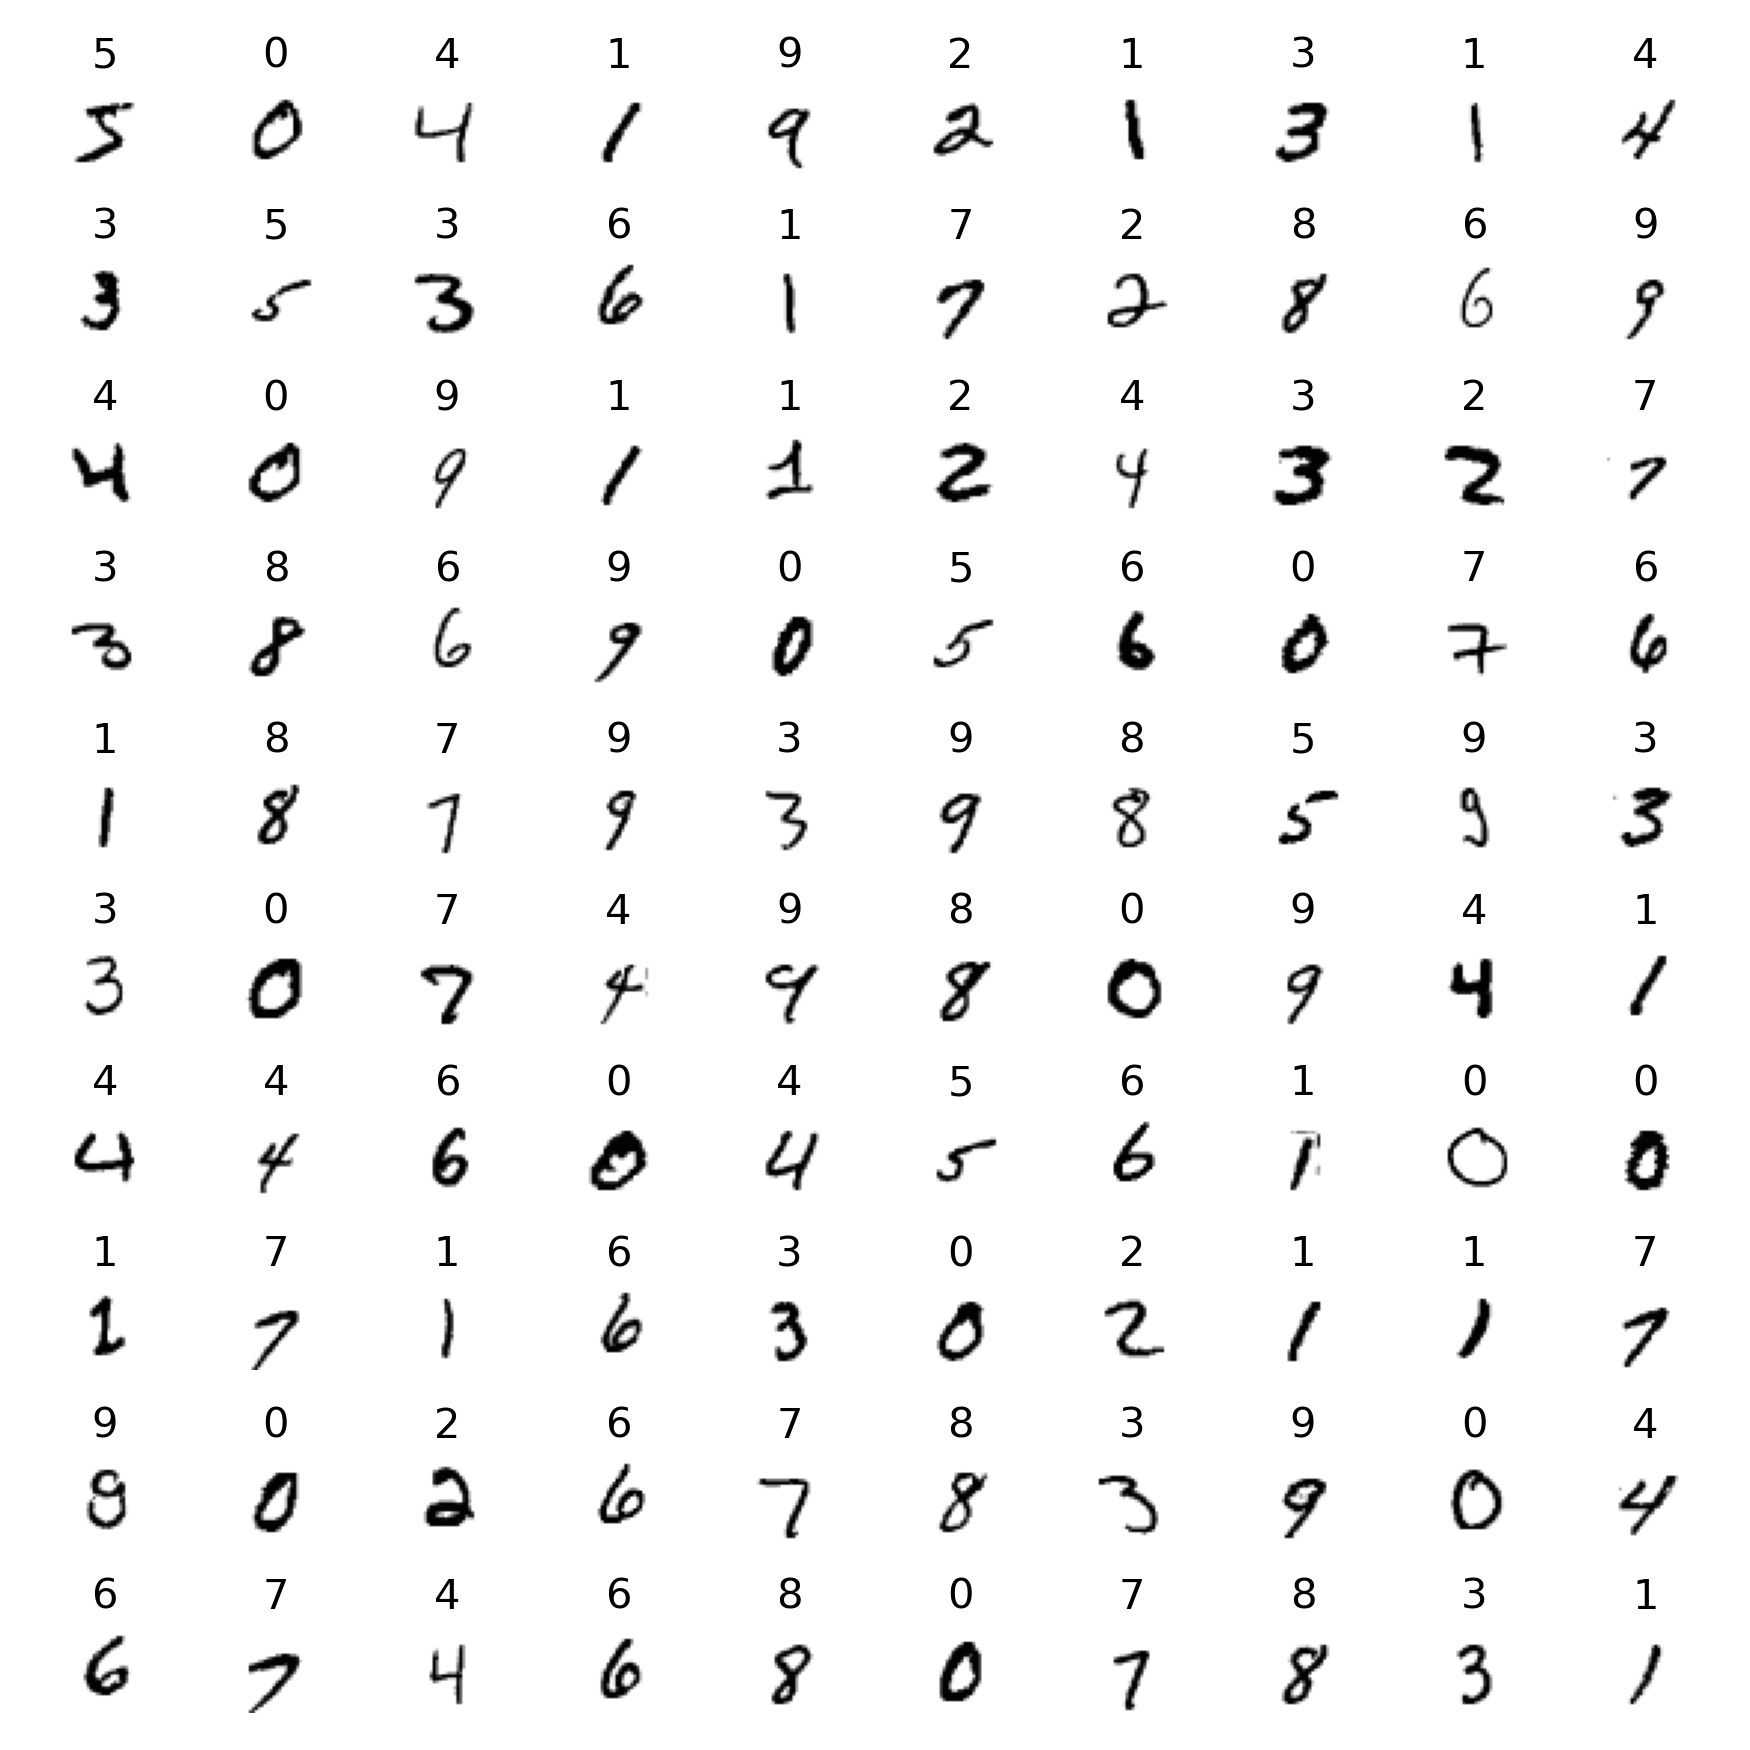

In [25]:
plt.figure(figsize=(7, 7))
for i in range(100):
    plt.subplot(10, 10, i+1)
    draw_image(Xtrain[i], Ttrain[i,0])
plt.tight_layout()

## Experiments
For each method, try various hidden layer structures, learning rates, and numbers of epochs. Use the validation percent accuracy to pick the best hidden layers, learning rates and numbers of epochs for each method (ignore learning rates for scg). Report training, validation and test accuracy for your best validation results for each of the three methods.

Include plots of data likelihood versus epochs, and confusion matrices, for best results for each method.

Write at least 10 sentences about what you observe in the likelihood plots, the train, validation and test accuracies, and the confusion matrices.

In [26]:
nnet = nn.NeuralNetworkClassifier(784, [], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Epoch 4 ObjectiveF=0.95819
SCG: Epoch 8 ObjectiveF=0.96994
SCG: Epoch 12 ObjectiveF=0.97146
SCG: Epoch 16 ObjectiveF=0.97146
SCG: Epoch 20 ObjectiveF=0.97146
SCG: Epoch 24 ObjectiveF=0.97273
SCG: Epoch 28 ObjectiveF=0.97421
SCG: Epoch 32 ObjectiveF=0.97475
SCG: Epoch 36 ObjectiveF=0.97494
SCG: Epoch 40 ObjectiveF=0.97496


NeuralNetwork(784, [], 10)

<IPython.core.display.Javascript object>


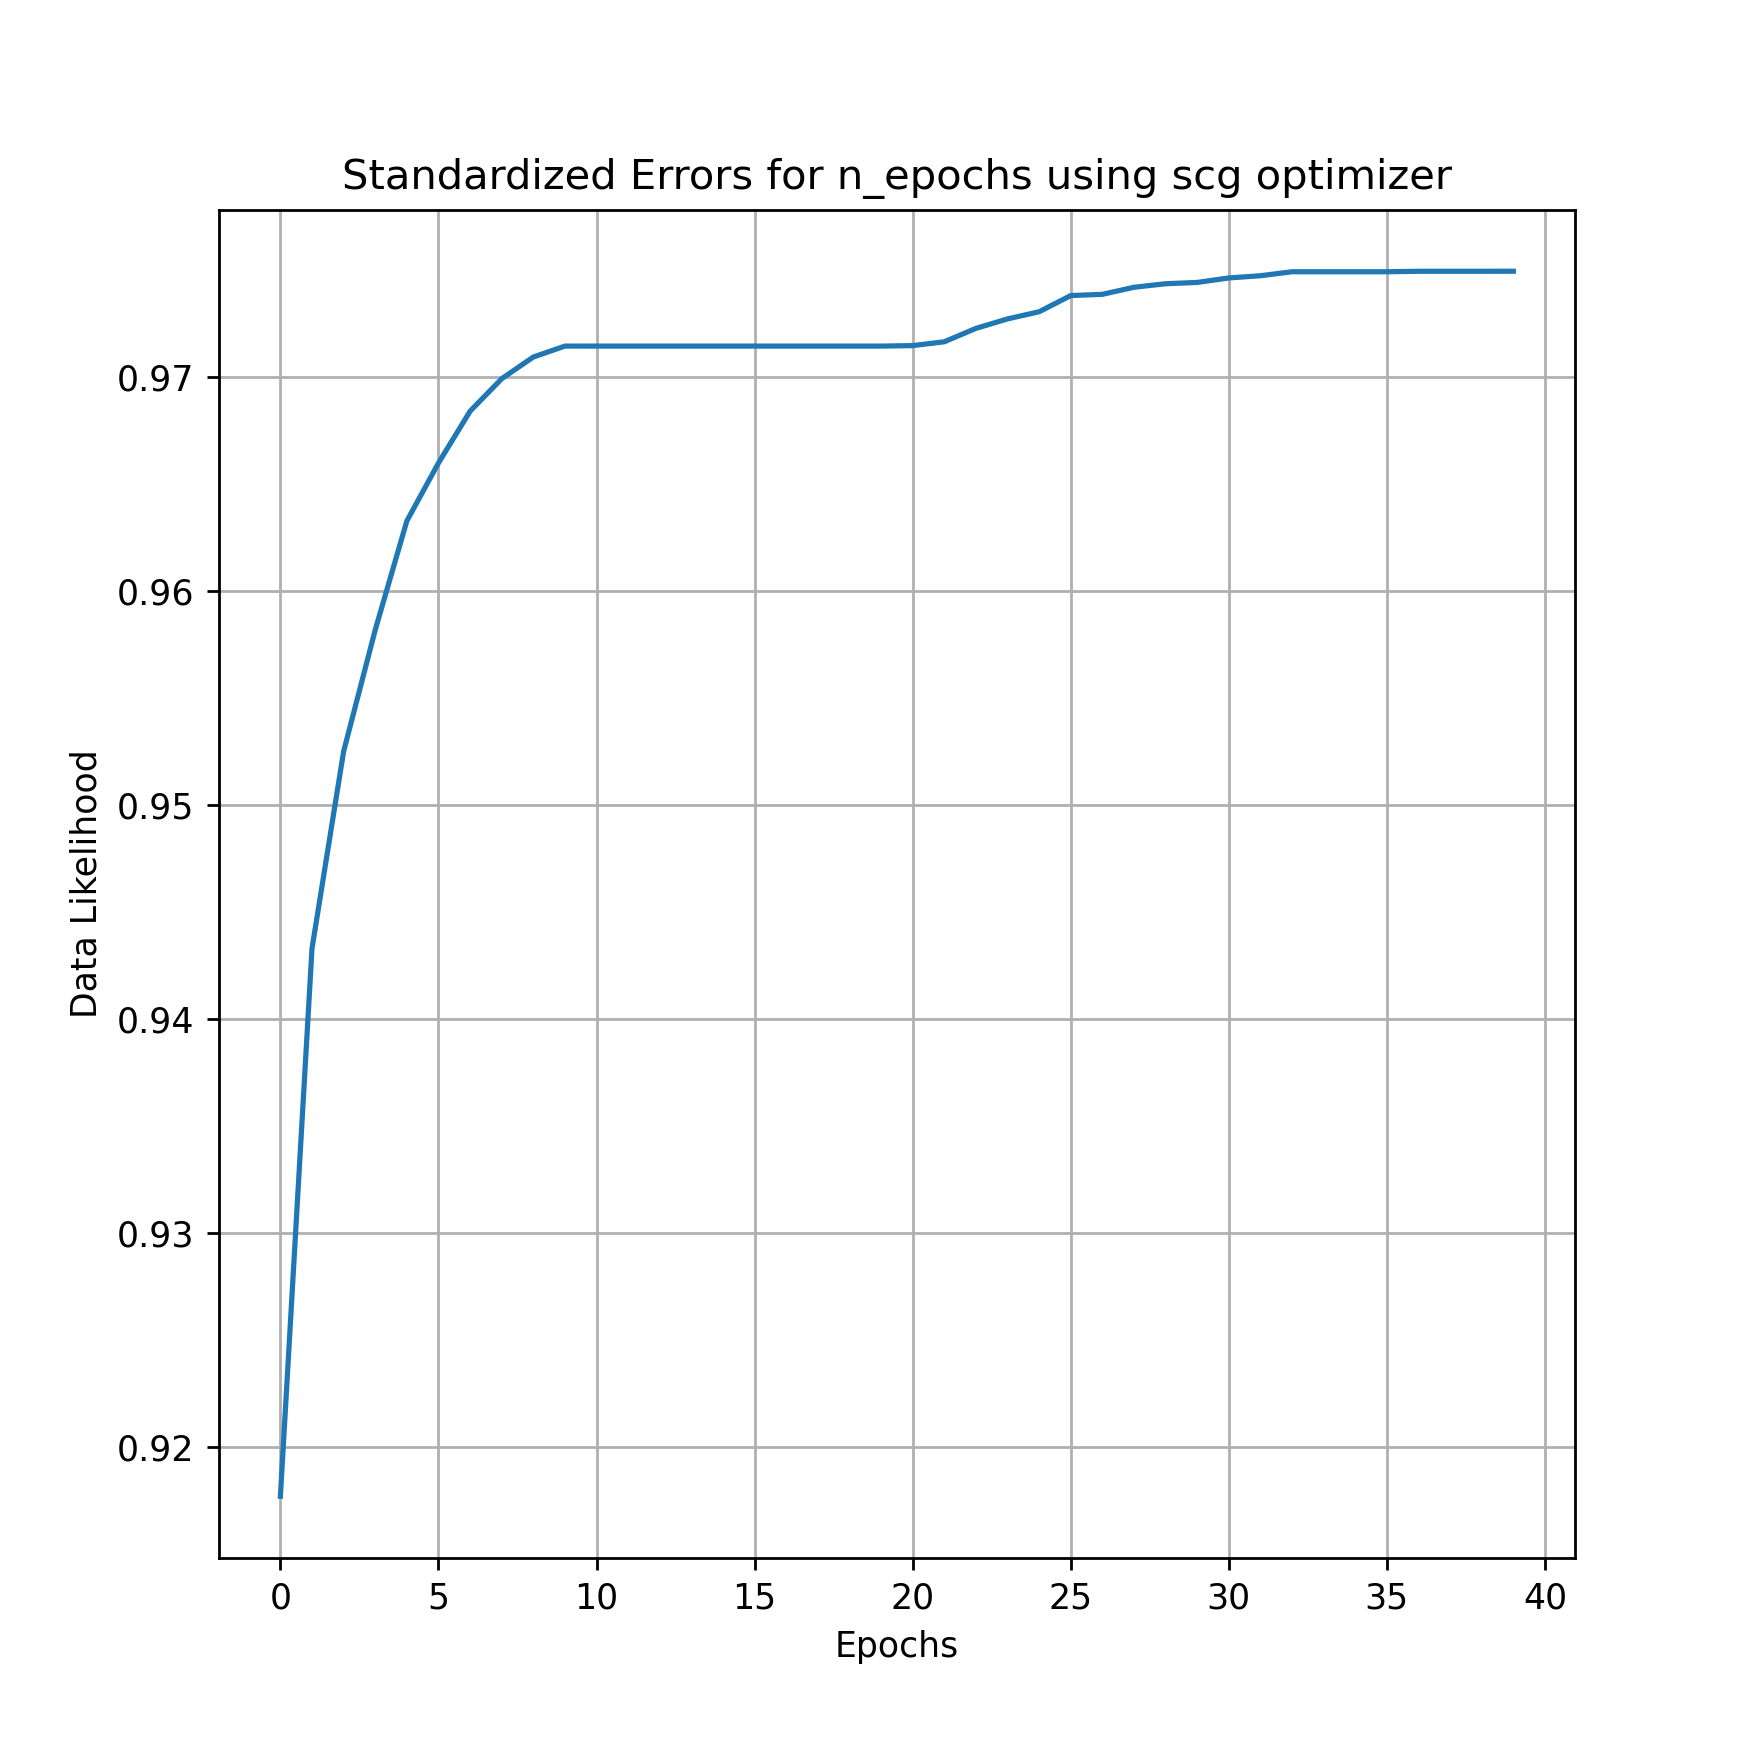

In [27]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using scg optimizer');

In [28]:
print(nnet)

NeuralNetwork(784, [], 10)
 Trained for 40 epochs.
 Final standardized training error 0.975.


In [29]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

[93.138, 92.65, 92.28]

In [30]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


In [31]:
nnet = nn.NeuralNetworkClassifier(784, [20], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Epoch 4 ObjectiveF=0.88560
SCG: Epoch 8 ObjectiveF=0.95820
SCG: Epoch 12 ObjectiveF=0.97325
SCG: Epoch 16 ObjectiveF=0.97961
SCG: Epoch 20 ObjectiveF=0.98322
SCG: Epoch 24 ObjectiveF=0.98575
SCG: Epoch 28 ObjectiveF=0.98762
SCG: Epoch 32 ObjectiveF=0.98896
SCG: Epoch 36 ObjectiveF=0.98981
SCG: Epoch 40 ObjectiveF=0.99067


NeuralNetwork(784, [20], 10)

<IPython.core.display.Javascript object>


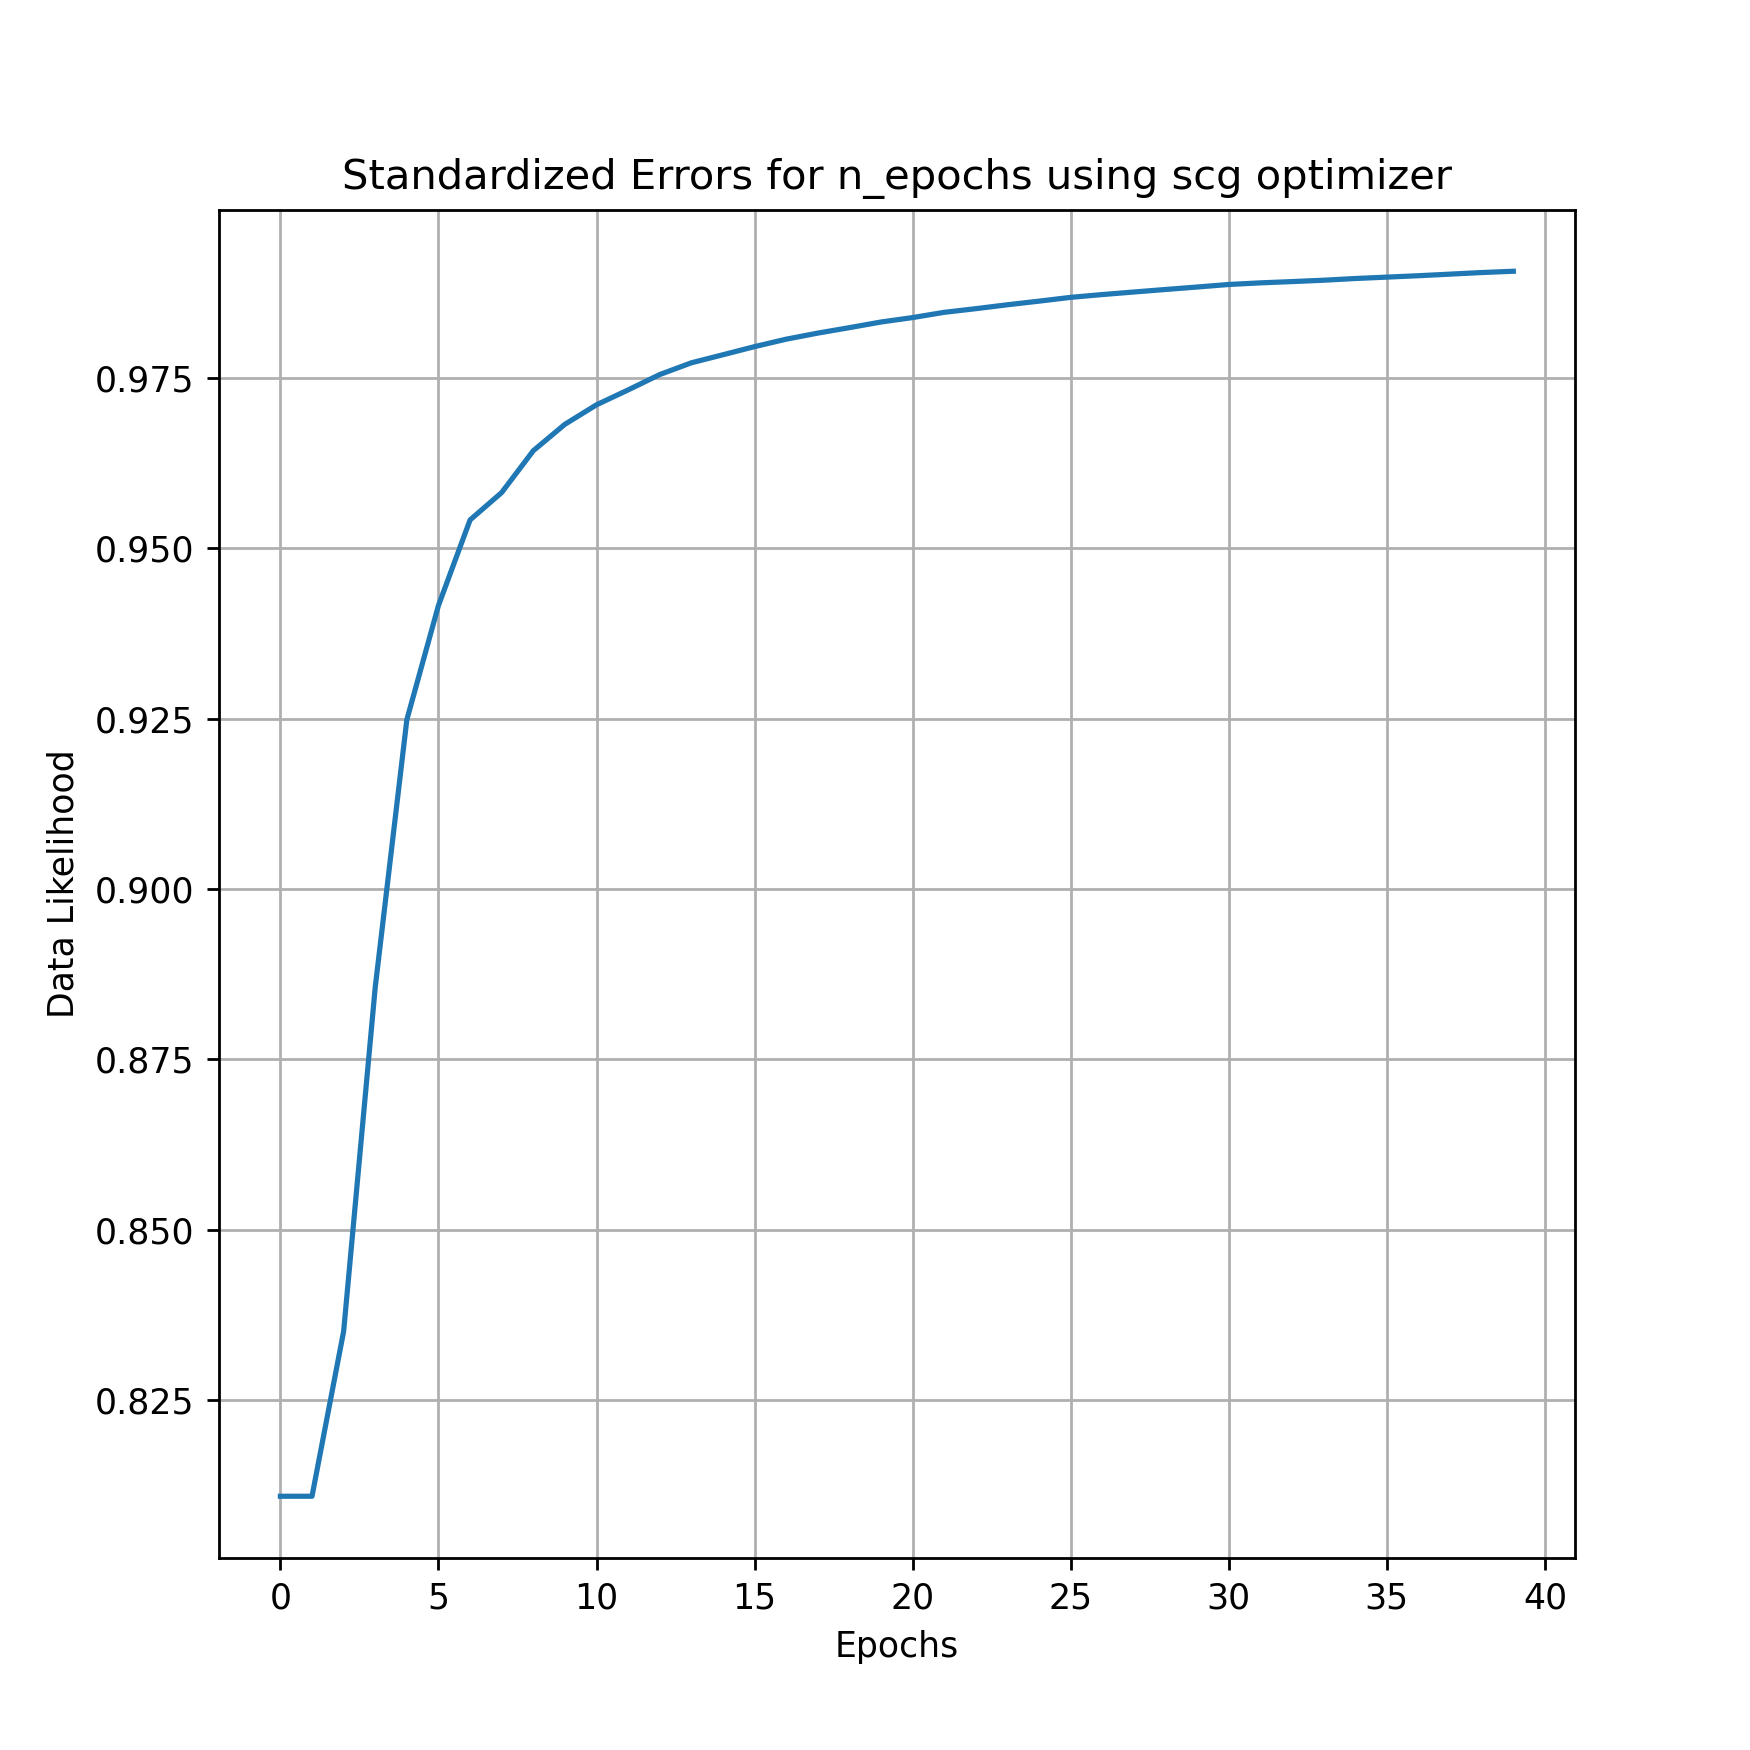

In [32]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using scg optimizer');

In [33]:
print(nnet)

NeuralNetwork(784, [20], 10)
 Trained for 40 epochs.
 Final standardized training error 0.9907.


In [34]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[97.47200000000001, 94.21000000000001, 93.62]

In [35]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


In [36]:
nnet = nn.NeuralNetworkClassifier(784, [10, 10, 10], 10)
nnet.train(Xtrain, Ttrain, n_epochs=60, method='scg')

SCG: Epoch 6 ObjectiveF=0.80444
SCG: Epoch 12 ObjectiveF=0.82928
SCG: Epoch 18 ObjectiveF=0.85017
SCG: Epoch 24 ObjectiveF=0.87883
SCG: Epoch 30 ObjectiveF=0.89551
SCG: Epoch 36 ObjectiveF=0.91913
SCG: Epoch 42 ObjectiveF=0.93364
SCG: Epoch 48 ObjectiveF=0.94483
SCG: Epoch 54 ObjectiveF=0.95519
SCG: Epoch 60 ObjectiveF=0.96263


NeuralNetwork(784, [10, 10, 10], 10)

<IPython.core.display.Javascript object>


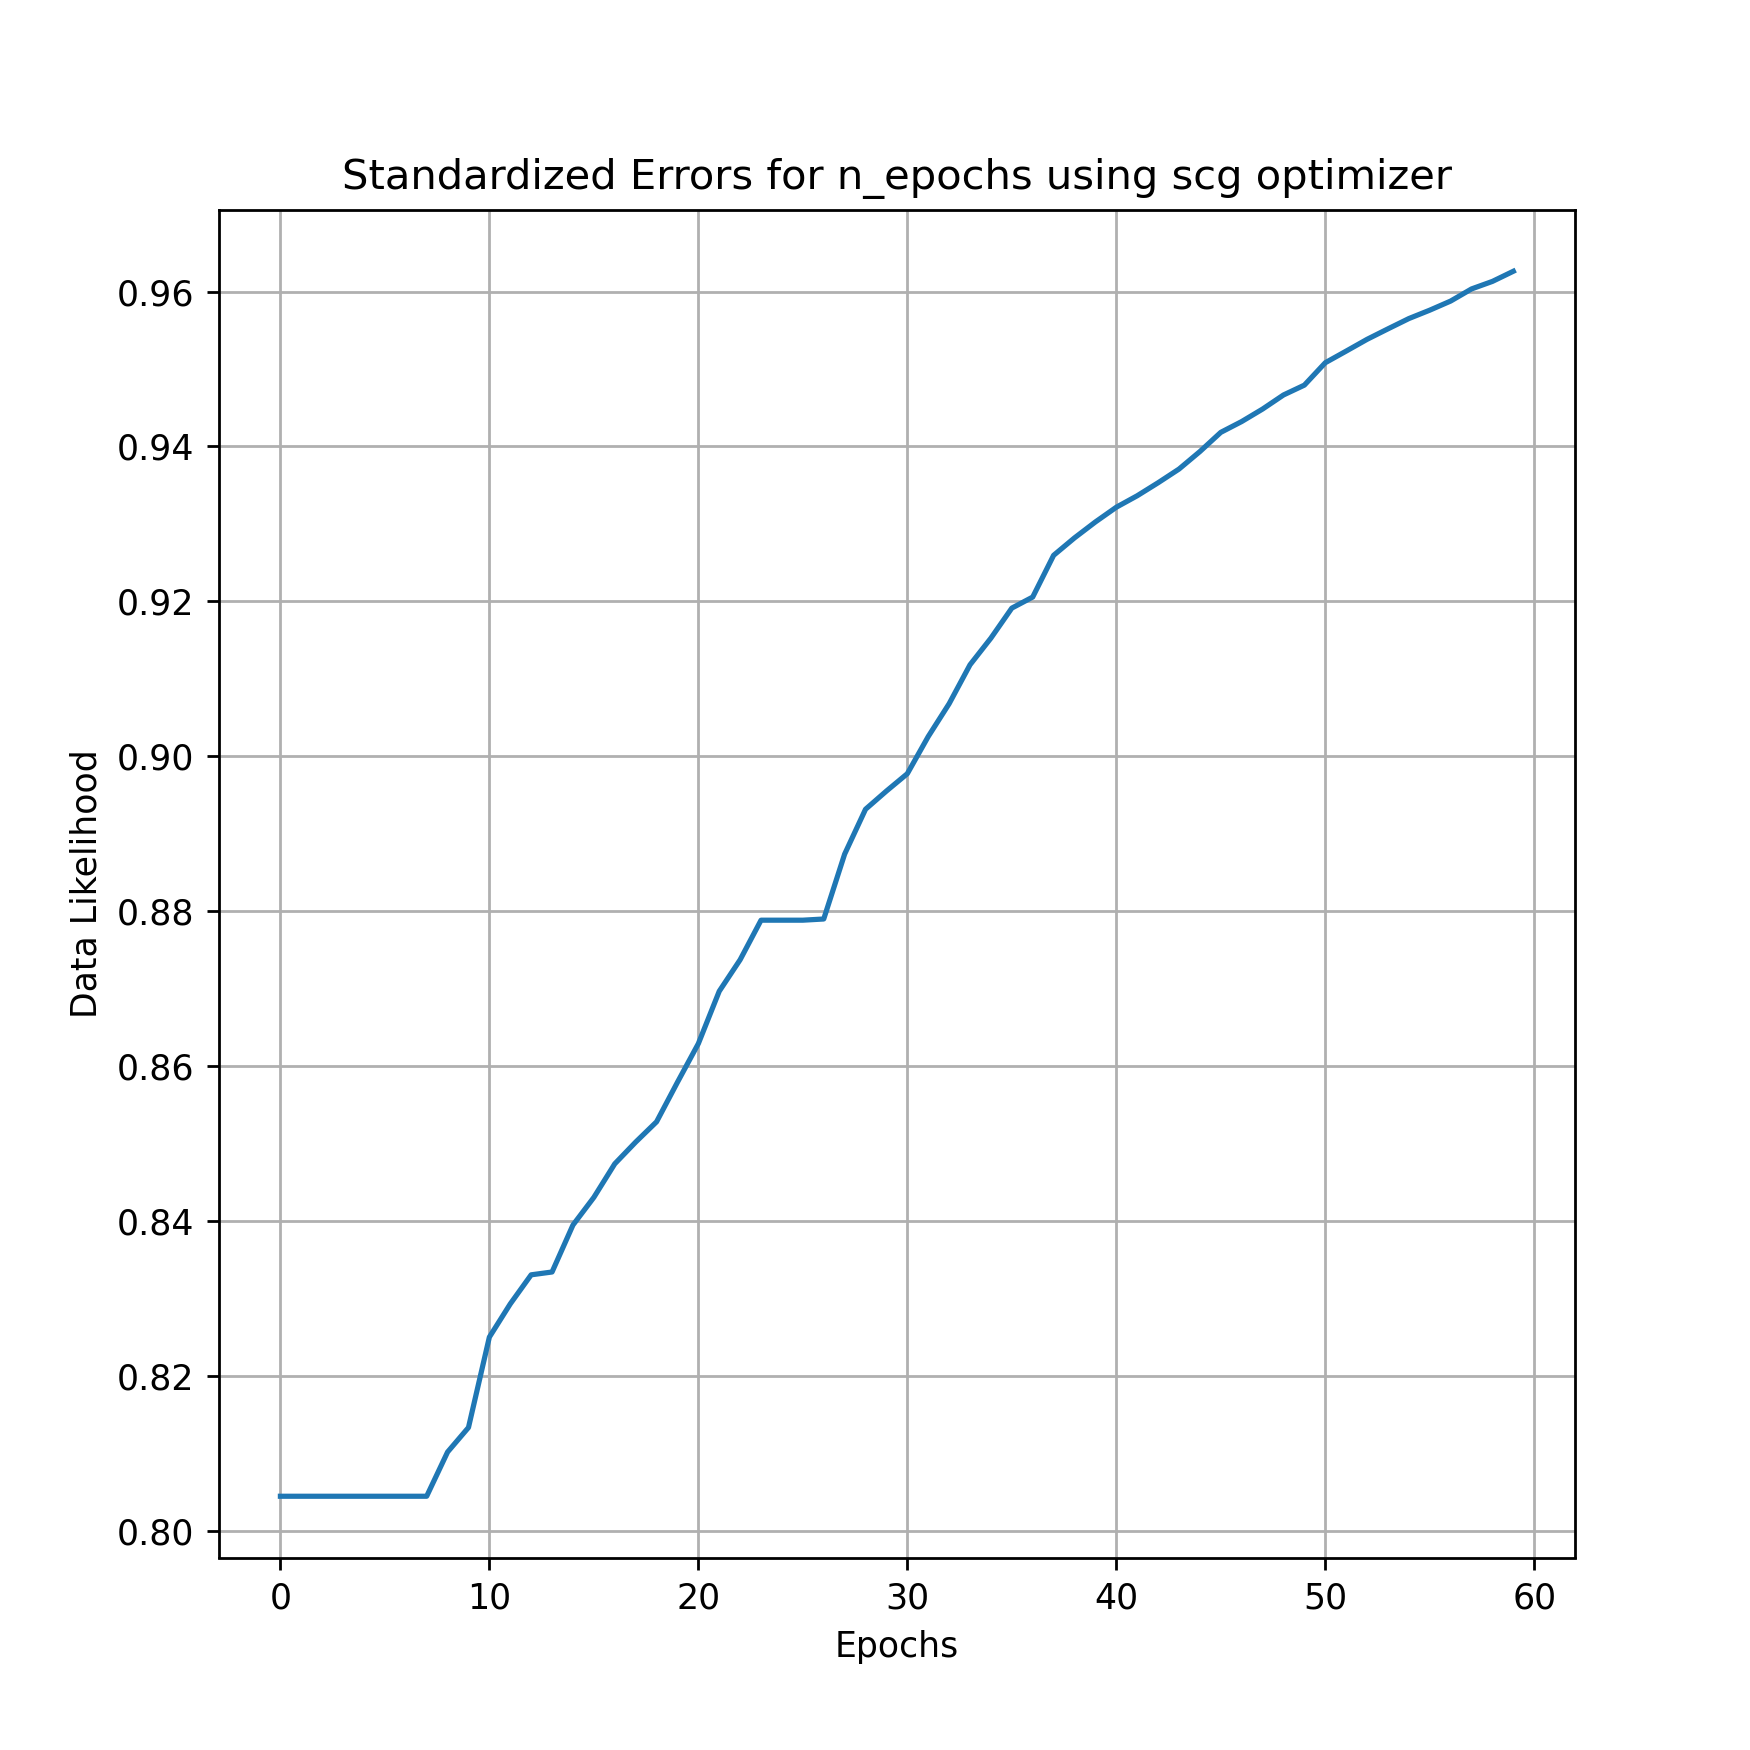

In [37]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using scg optimizer');

In [38]:
print(nnet)

NeuralNetwork(784, [10, 10, 10], 10)
 Trained for 60 epochs.
 Final standardized training error 0.9626.


In [39]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

[89.428, 89.03, 88.92]

In [40]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


In [41]:
nnet = nn.NeuralNetworkClassifier(784, [50,50], 10)
nnet.train(Xtrain, Ttrain, n_epochs=50, method='scg')

SCG: Epoch 5 ObjectiveF=0.80412
SCG: Epoch 10 ObjectiveF=0.80825
SCG: Epoch 15 ObjectiveF=0.82268
SCG: Epoch 20 ObjectiveF=0.84339
SCG: Epoch 25 ObjectiveF=0.91333
SCG: Epoch 30 ObjectiveF=0.95114
SCG: Epoch 35 ObjectiveF=0.96597
SCG: Epoch 40 ObjectiveF=0.97575
SCG: Epoch 45 ObjectiveF=0.98241
SCG: Epoch 50 ObjectiveF=0.98735


NeuralNetwork(784, [50, 50], 10)

<IPython.core.display.Javascript object>


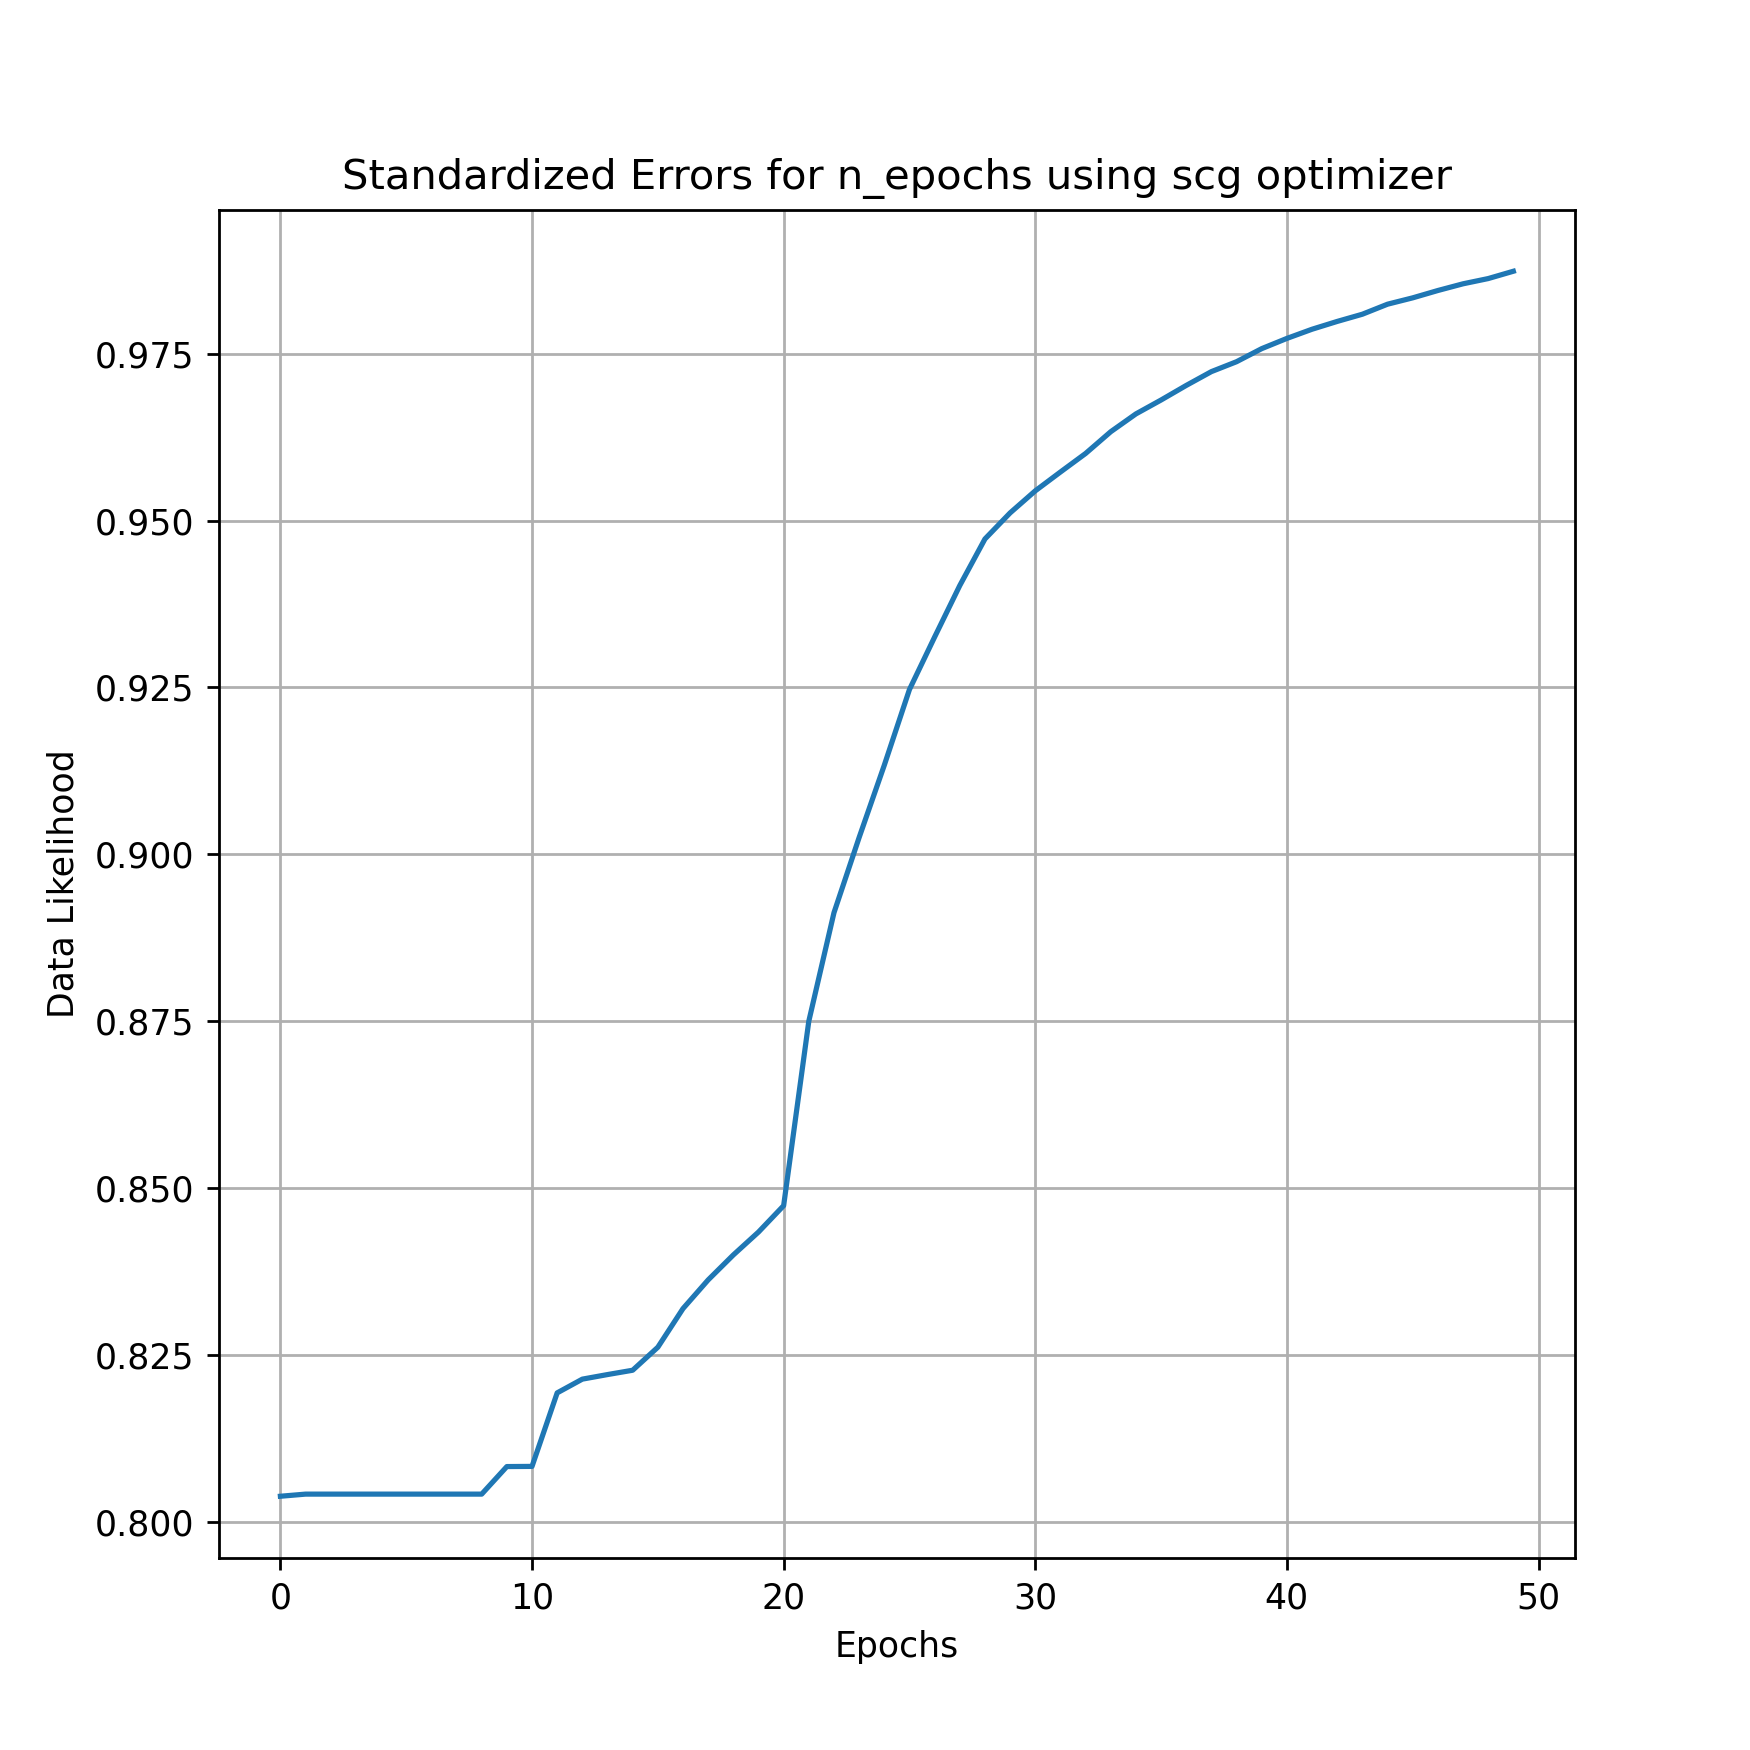

In [42]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using scg optimizer');

In [43]:
print(nnet)

NeuralNetwork(784, [50, 50], 10)
 Trained for 50 epochs.
 Final standardized training error 0.9873.


In [44]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[96.232, 94.93, 94.76]

In [45]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


In [46]:
print(nnet)

NeuralNetwork(784, [50, 50], 10)
 Trained for 50 epochs.
 Final standardized training error 0.9873.


In [47]:
nnet = nn.NeuralNetworkClassifier(784, [], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='sgd', learning_rate=0.001)

sgd: Epoch 4 ObjectiveF=0.79099
sgd: Epoch 8 ObjectiveF=0.79214
sgd: Epoch 12 ObjectiveF=0.79380
sgd: Epoch 16 ObjectiveF=0.79578
sgd: Epoch 20 ObjectiveF=0.79795
sgd: Epoch 24 ObjectiveF=0.80023
sgd: Epoch 28 ObjectiveF=0.80257
sgd: Epoch 32 ObjectiveF=0.80493
sgd: Epoch 36 ObjectiveF=0.80730
sgd: Epoch 40 ObjectiveF=0.80964


NeuralNetwork(784, [], 10)

<IPython.core.display.Javascript object>


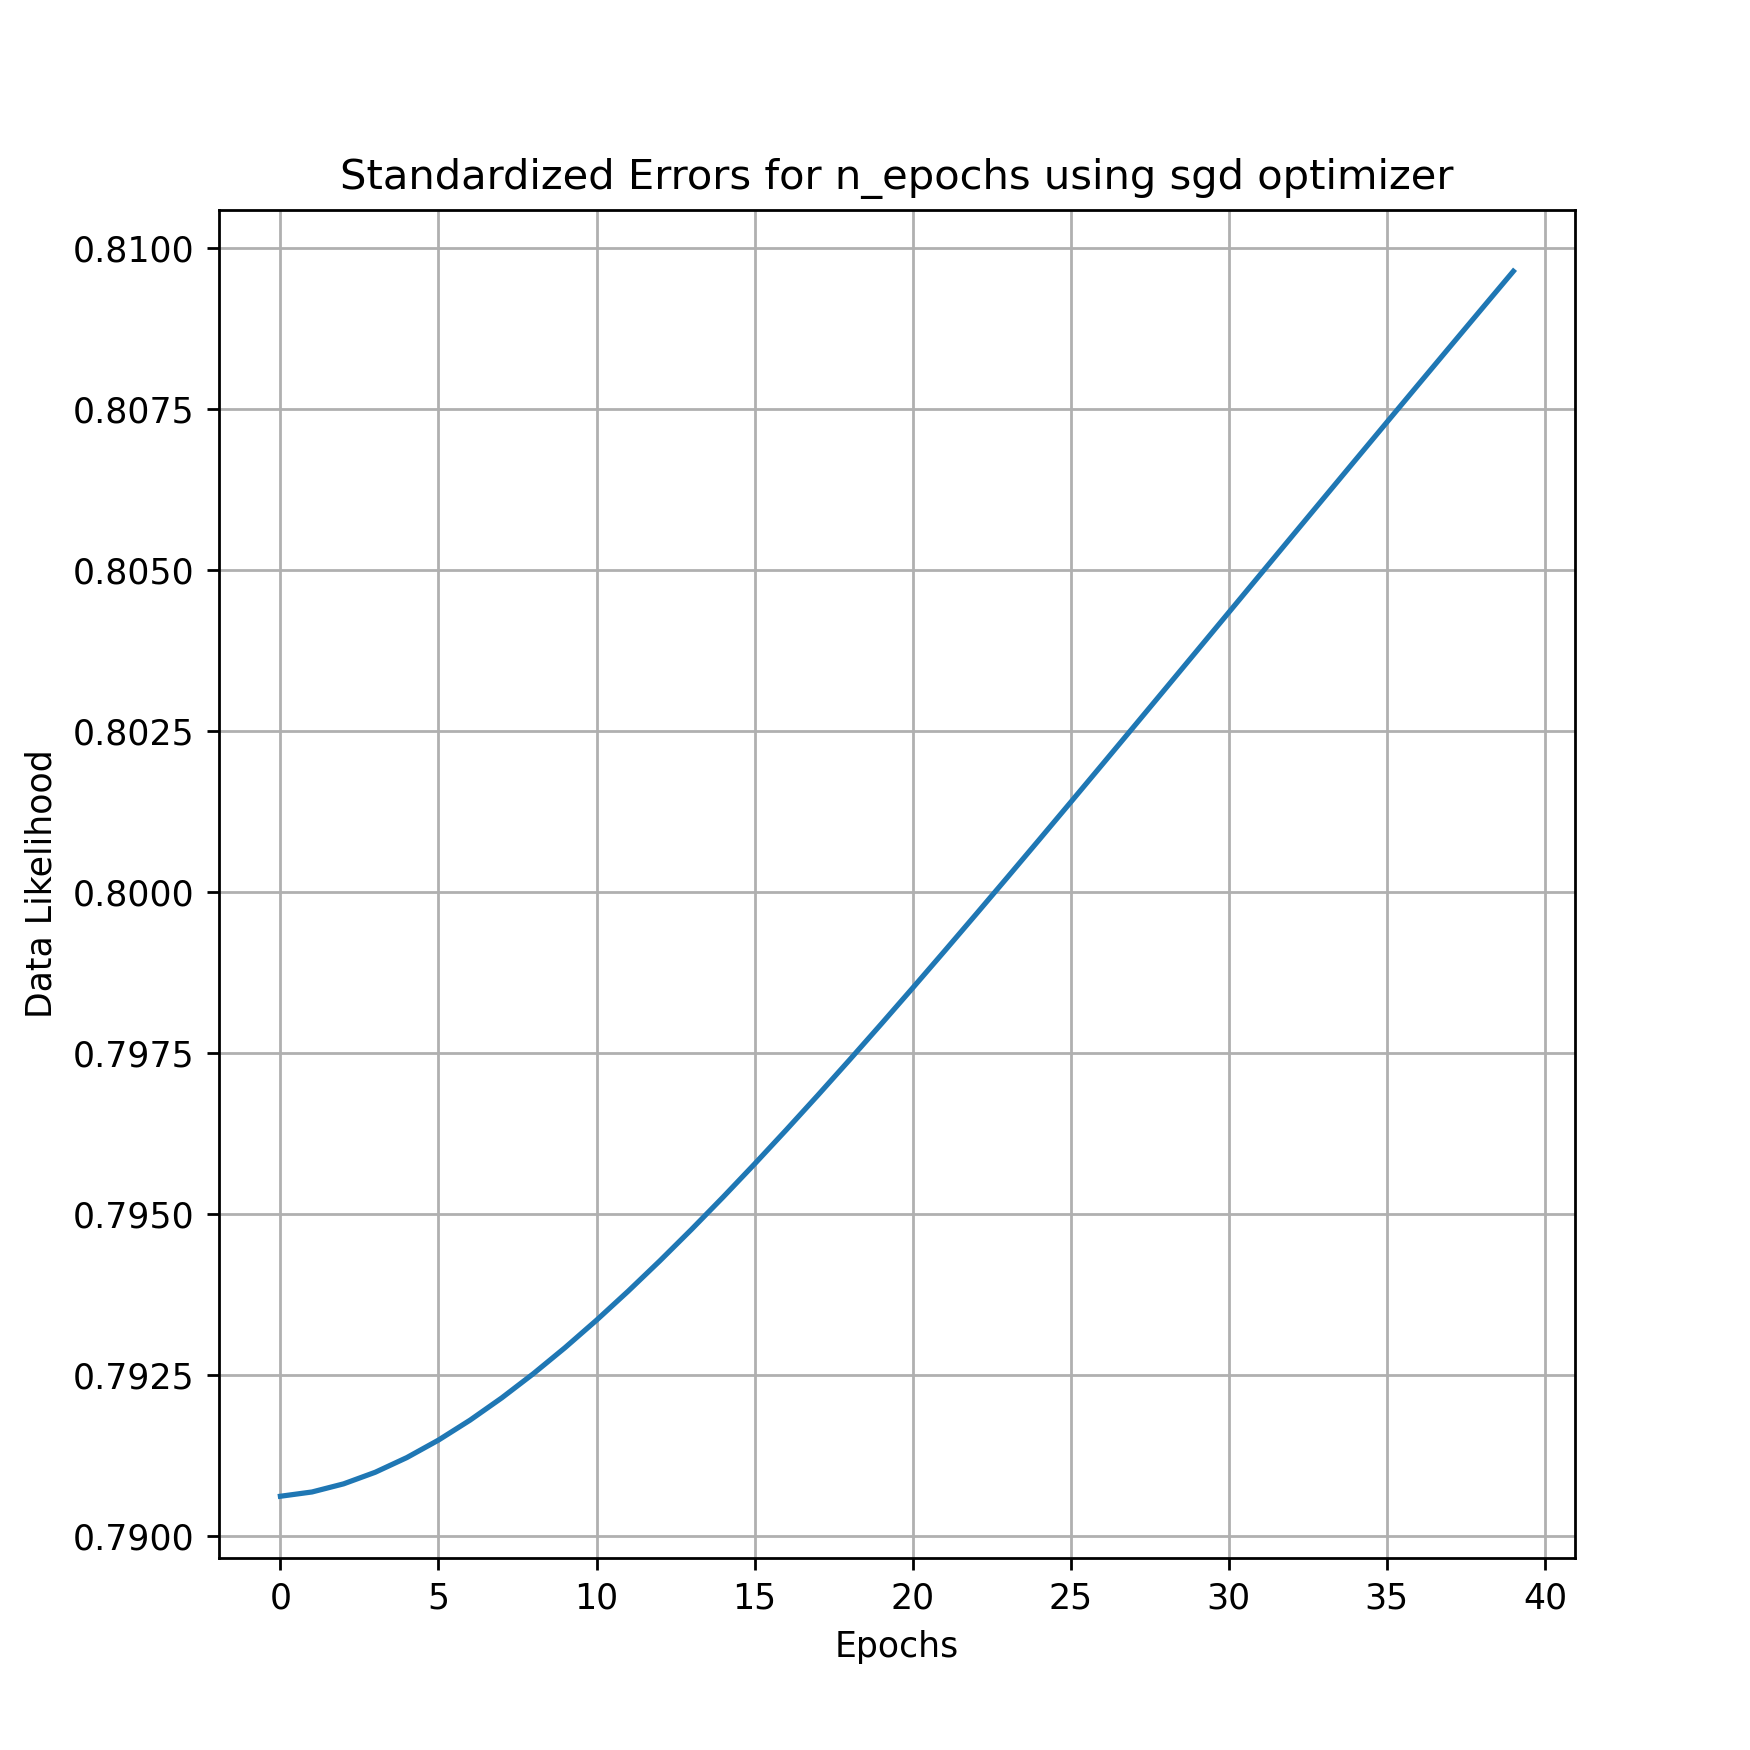

In [48]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using sgd optimizer');

In [49]:
print(nnet)

NeuralNetwork(784, [], 10)
 Trained for 40 epochs.
 Final standardized training error 0.8096.


In [50]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[37.906, 38.940000000000005, 38.629999999999995]

In [51]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


In [52]:
nnet = nn.NeuralNetworkClassifier(784, [100], 10)
nnet.train(Xtrain, Ttrain, n_epochs=60, method='sgd', learning_rate=0.001)

sgd: Epoch 6 ObjectiveF=0.79691
sgd: Epoch 12 ObjectiveF=0.79732
sgd: Epoch 18 ObjectiveF=0.79786
sgd: Epoch 24 ObjectiveF=0.79843
sgd: Epoch 30 ObjectiveF=0.79901
sgd: Epoch 36 ObjectiveF=0.79957
sgd: Epoch 42 ObjectiveF=0.80011
sgd: Epoch 48 ObjectiveF=0.80061
sgd: Epoch 54 ObjectiveF=0.80108
sgd: Epoch 60 ObjectiveF=0.80152


NeuralNetwork(784, [100], 10)

<IPython.core.display.Javascript object>


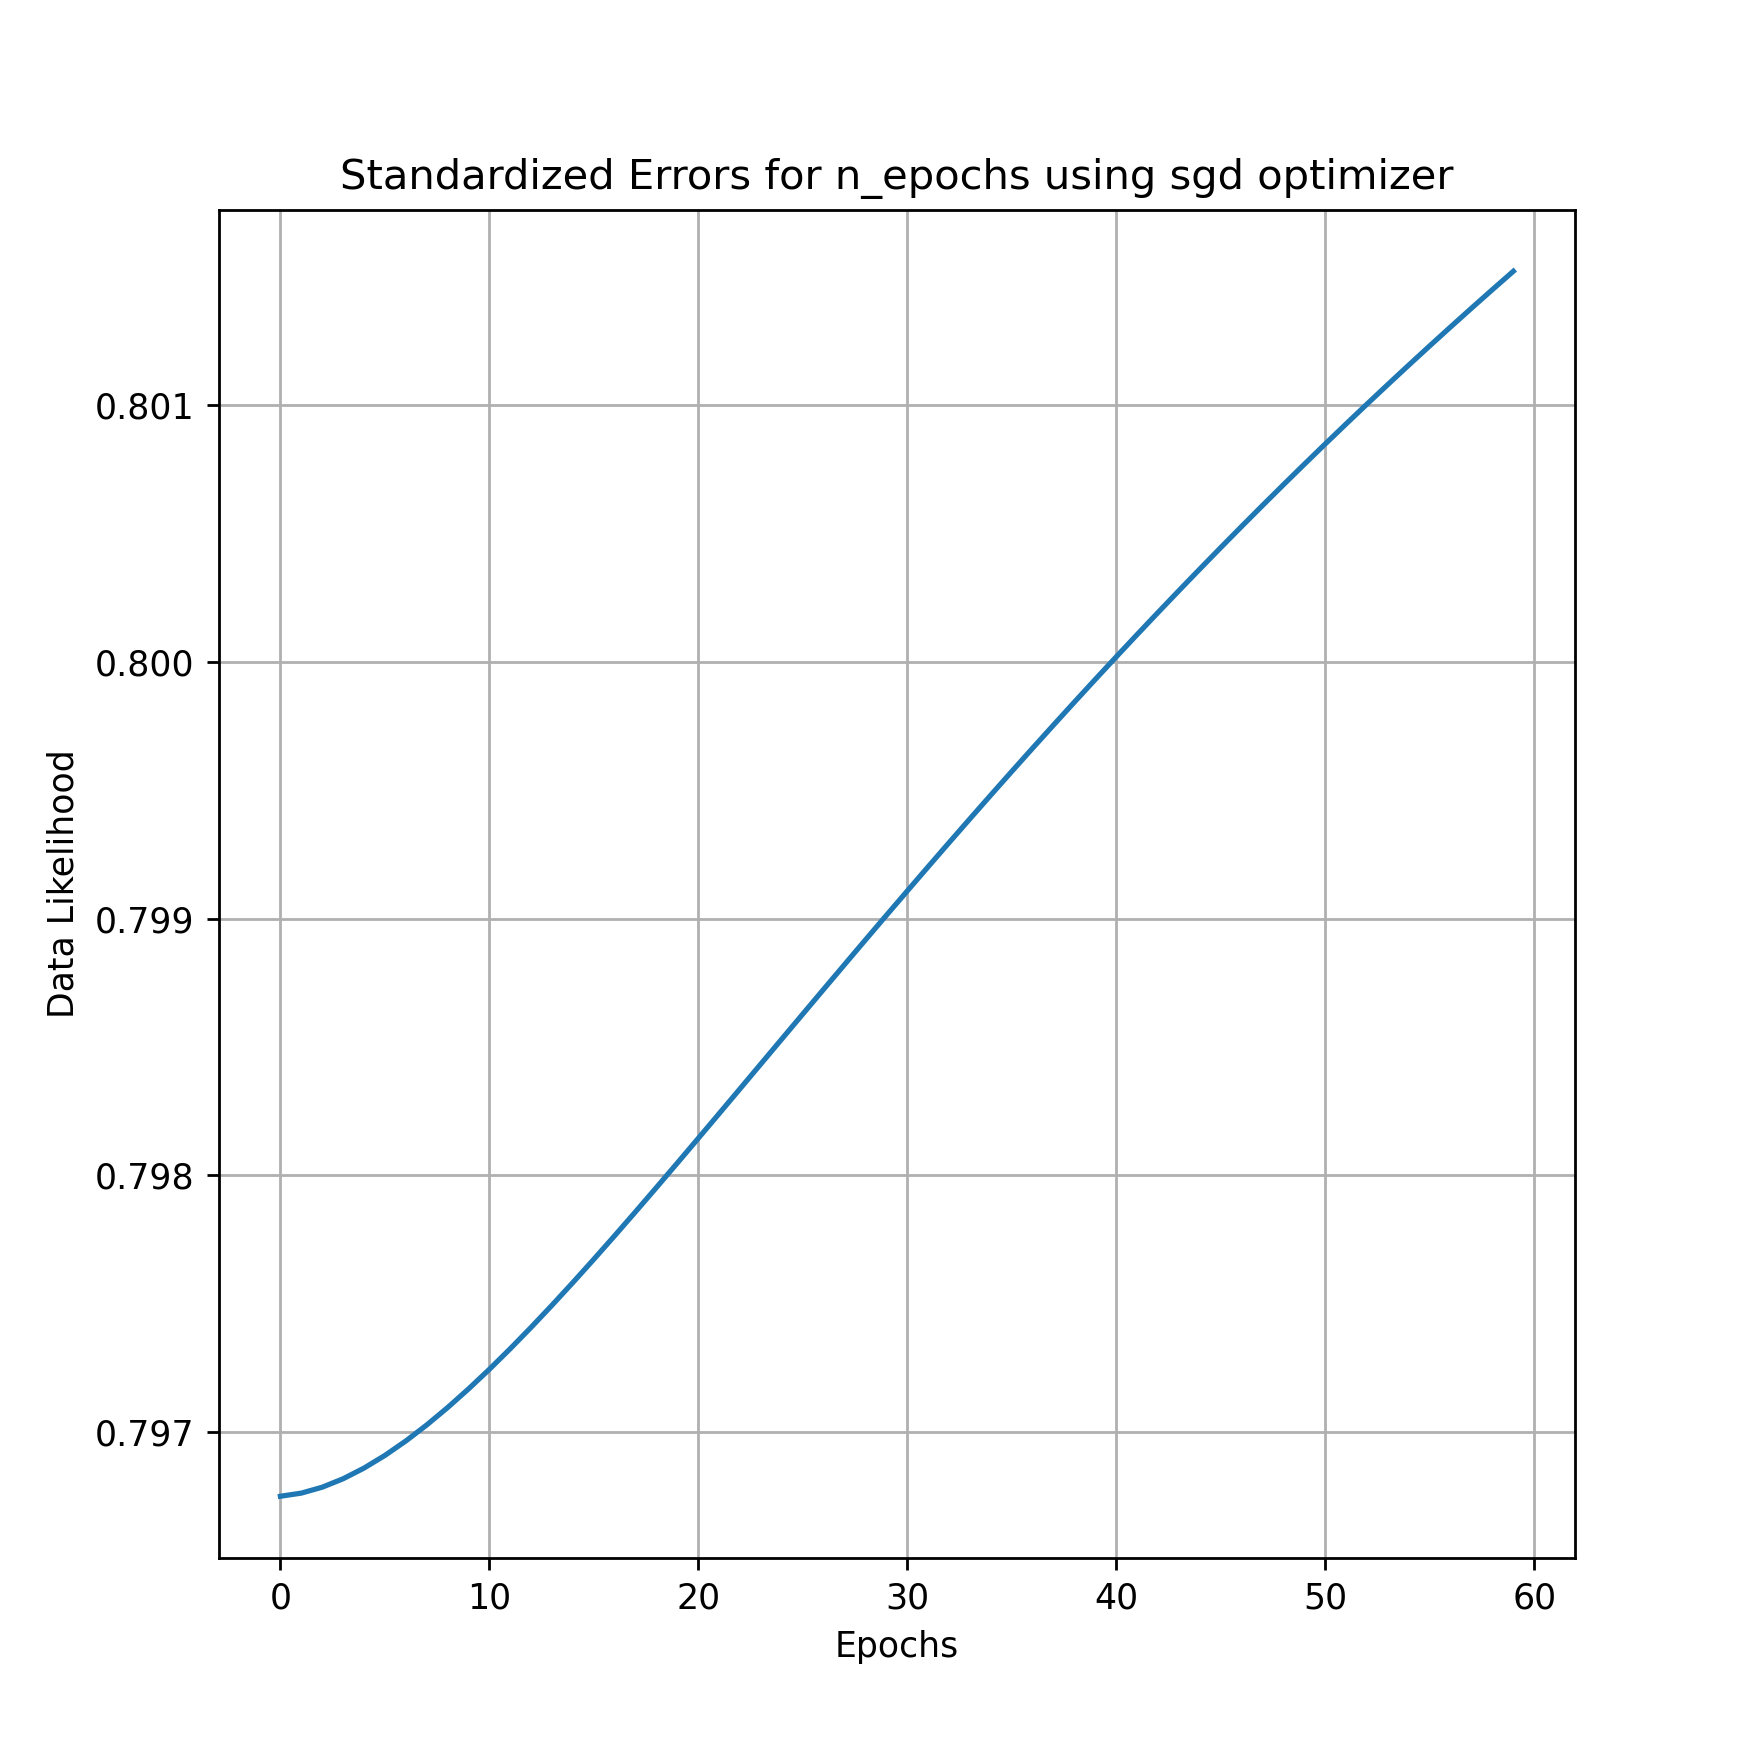

In [53]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using sgd optimizer');

In [54]:
print(nnet)

NeuralNetwork(784, [100], 10)
 Trained for 60 epochs.
 Final standardized training error 0.8015.


In [55]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[17.506, 16.439999999999998, 17.299999999999997]

In [56]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


In [57]:
print(nnet)

NeuralNetwork(784, [100], 10)
 Trained for 60 epochs.
 Final standardized training error 0.8015.


In [58]:
nnet = nn.NeuralNetworkClassifier(784, [50,50], 10)
nnet.train(Xtrain, Ttrain, n_epochs=50, method='sgd', learning_rate=0.001)

sgd: Epoch 5 ObjectiveF=0.79107
sgd: Epoch 10 ObjectiveF=0.79135
sgd: Epoch 15 ObjectiveF=0.79174
sgd: Epoch 20 ObjectiveF=0.79218
sgd: Epoch 25 ObjectiveF=0.79264
sgd: Epoch 30 ObjectiveF=0.79310
sgd: Epoch 35 ObjectiveF=0.79356
sgd: Epoch 40 ObjectiveF=0.79400
sgd: Epoch 45 ObjectiveF=0.79444
sgd: Epoch 50 ObjectiveF=0.79485


NeuralNetwork(784, [50, 50], 10)

<IPython.core.display.Javascript object>


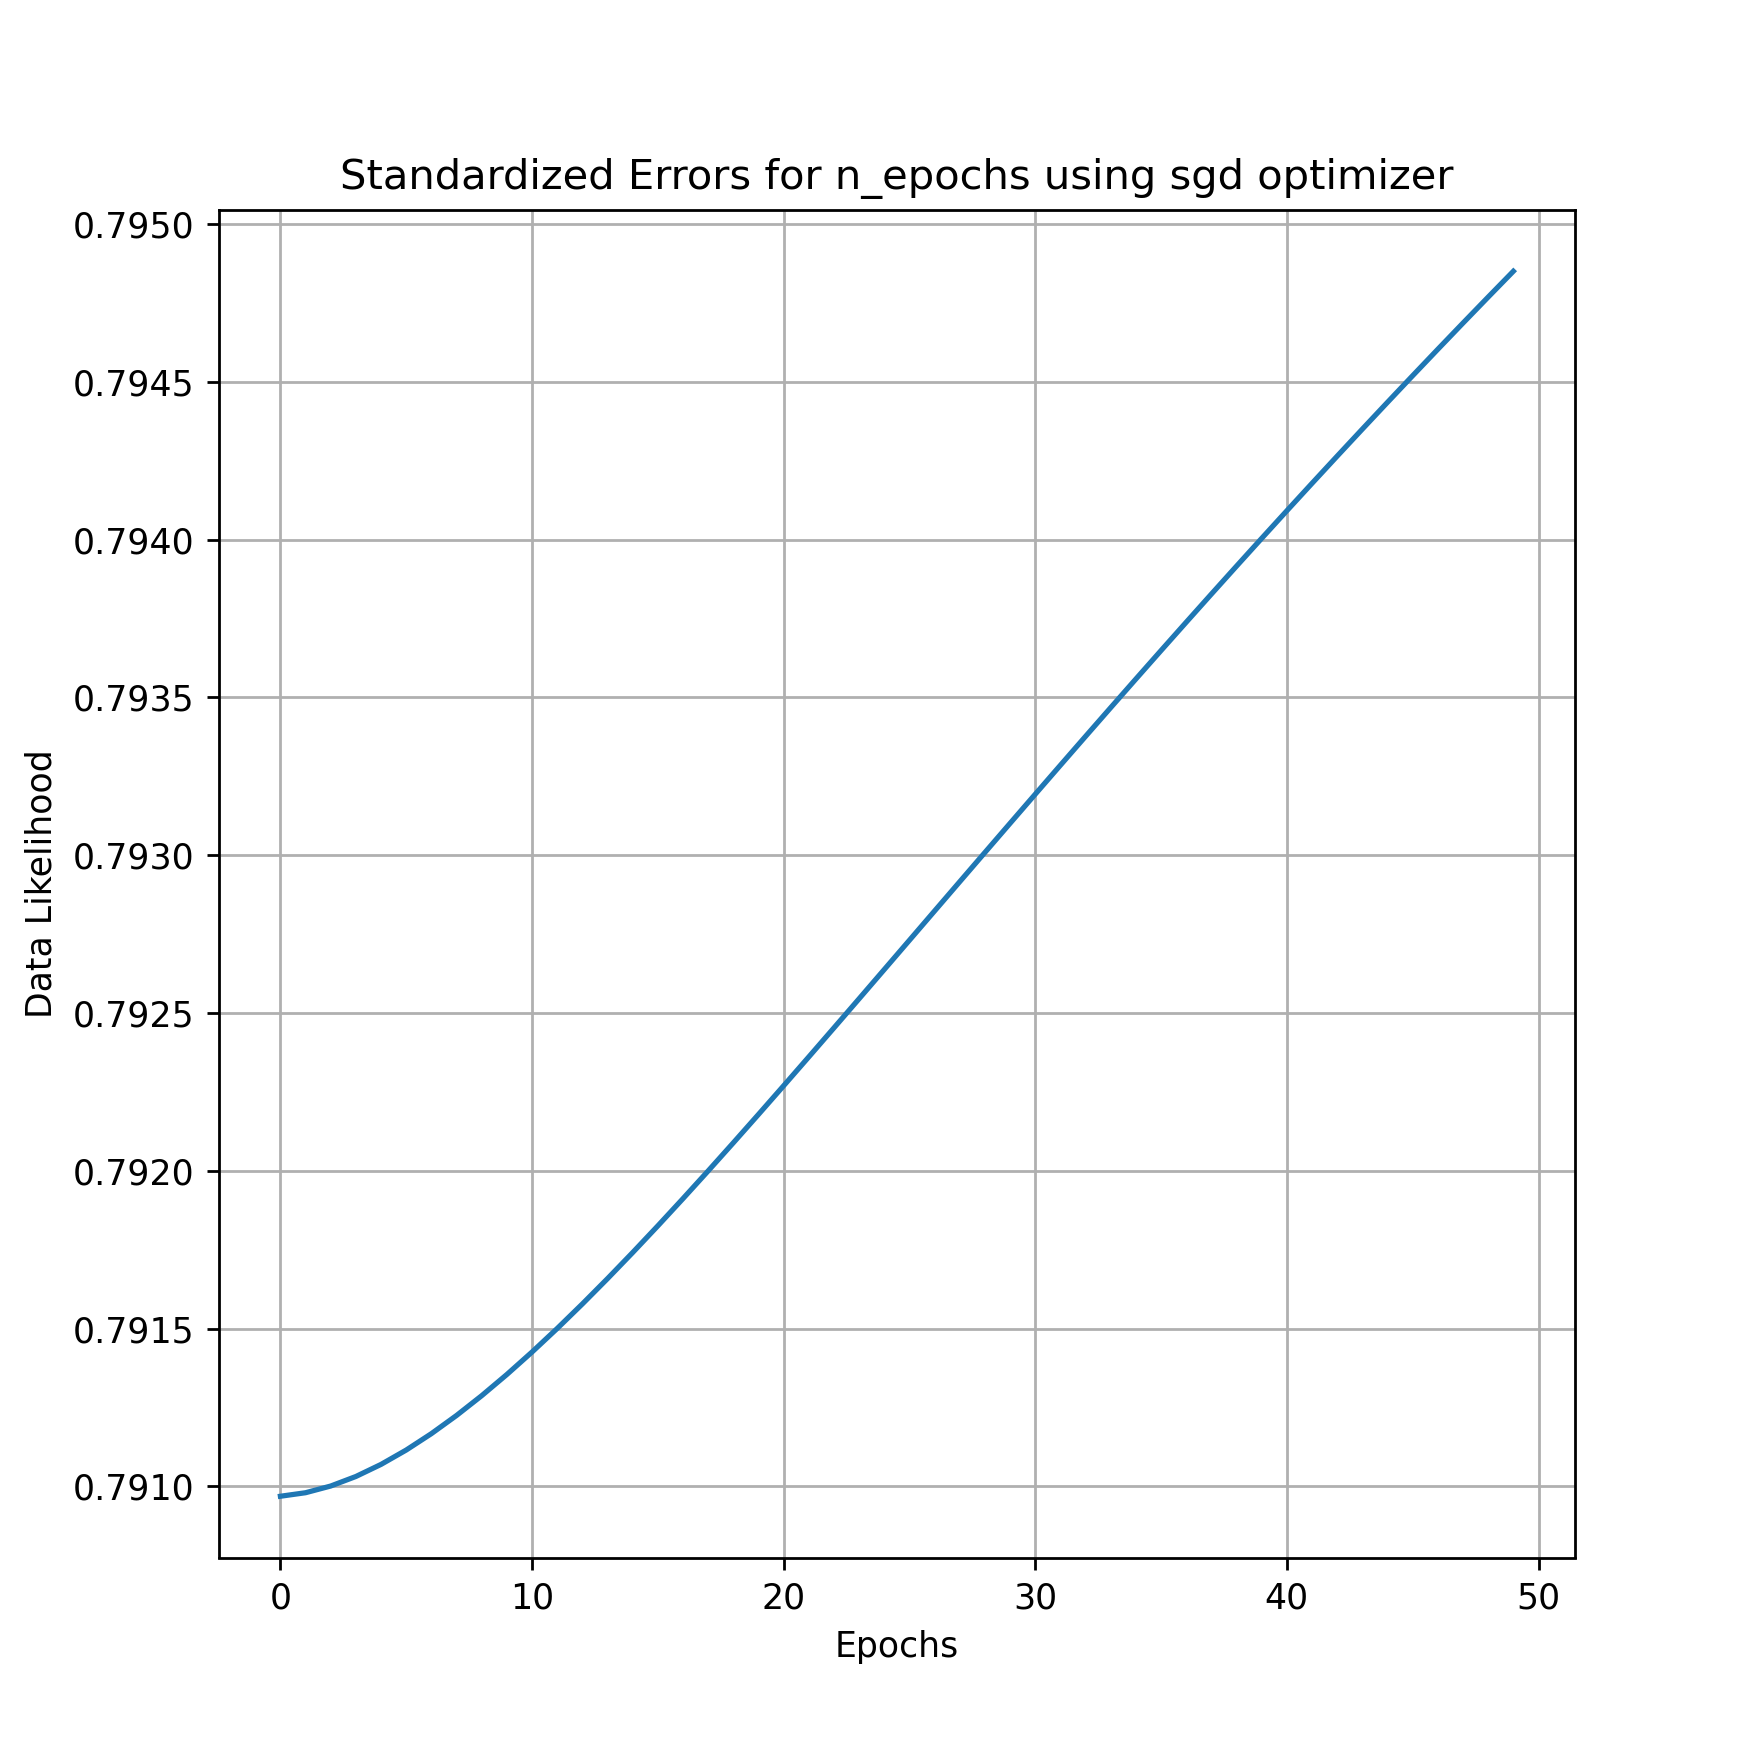

In [59]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using sgd optimizer');

In [60]:
print(nnet)

NeuralNetwork(784, [50, 50], 10)
 Trained for 50 epochs.
 Final standardized training error 0.7949.


In [61]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],[Ttrain, Tval, Ttest])]

[12.334, 12.5, 12.49]

In [62]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


In [63]:
nnet = nn.NeuralNetworkClassifier(784, [25,25,25], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='sgd', learning_rate=0.001)

sgd: Epoch 4 ObjectiveF=0.79510
sgd: Epoch 8 ObjectiveF=0.79516
sgd: Epoch 12 ObjectiveF=0.79526
sgd: Epoch 16 ObjectiveF=0.79536
sgd: Epoch 20 ObjectiveF=0.79548
sgd: Epoch 24 ObjectiveF=0.79561
sgd: Epoch 28 ObjectiveF=0.79574
sgd: Epoch 32 ObjectiveF=0.79587
sgd: Epoch 36 ObjectiveF=0.79600
sgd: Epoch 40 ObjectiveF=0.79613


NeuralNetwork(784, [25, 25, 25], 10)

<IPython.core.display.Javascript object>


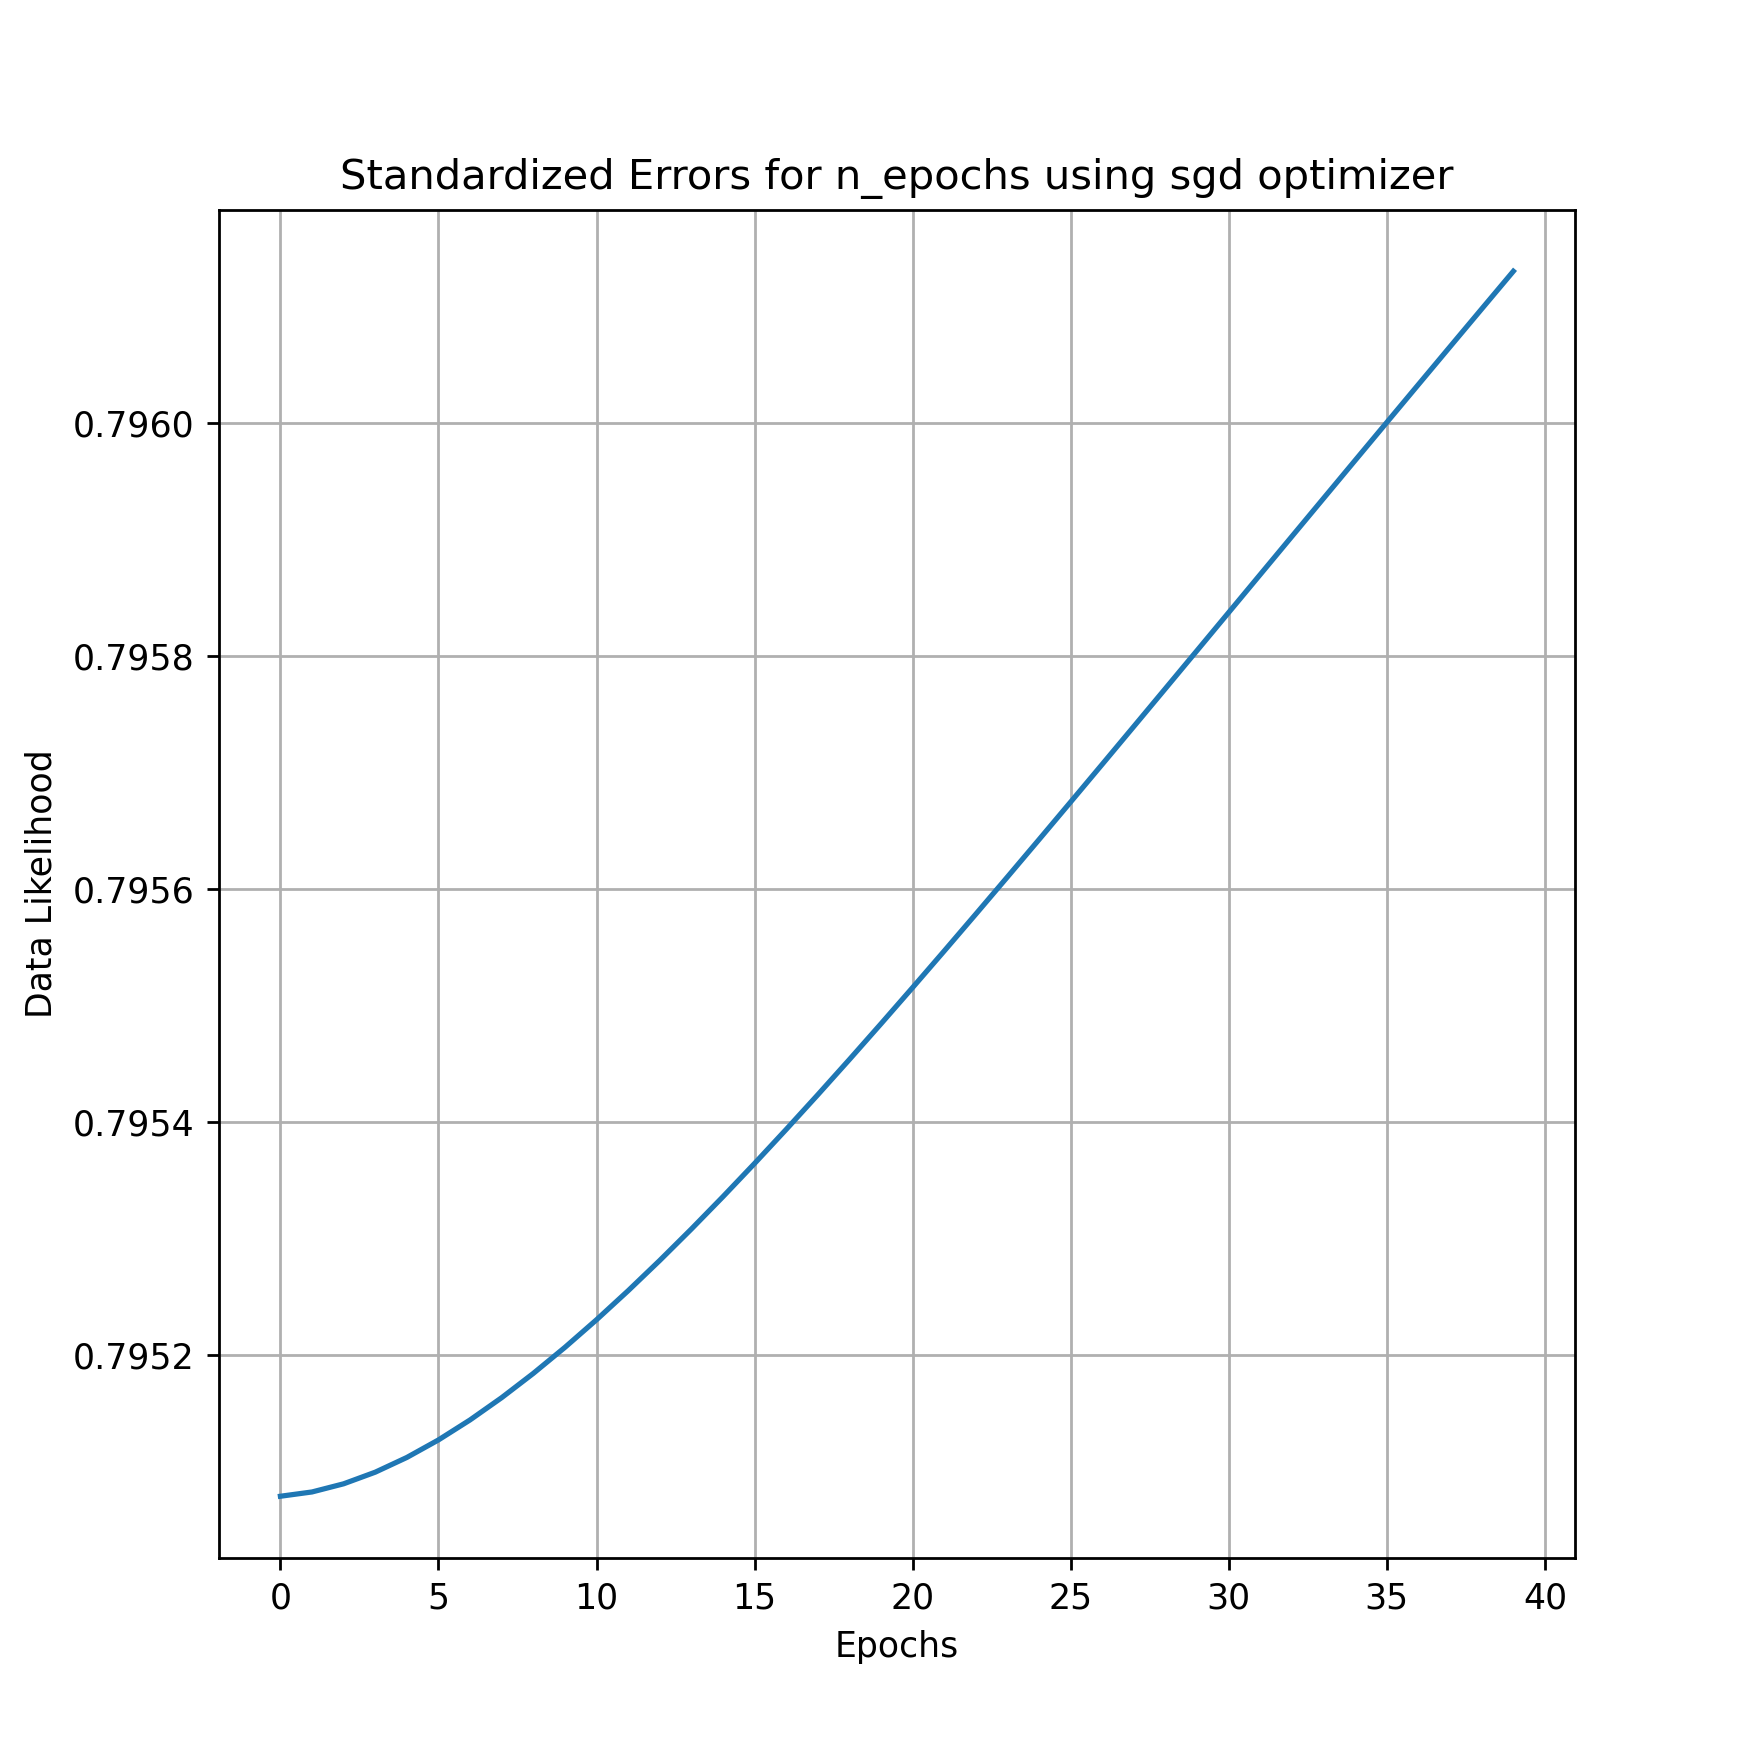

In [64]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using sgd optimizer');

In [65]:
print(nnet)

NeuralNetwork(784, [25, 25, 25], 10)
 Trained for 40 epochs.
 Final standardized training error 0.7961.


In [66]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[9.950000000000001, 9.85, 9.959999999999999]

In [67]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


In [68]:
nnet = nn.NeuralNetworkClassifier(784, [], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='adam', learning_rate=0.001)

Adam: Epoch 4 ObjectiveF=0.82623
Adam: Epoch 8 ObjectiveF=0.86513
Adam: Epoch 12 ObjectiveF=0.89191
Adam: Epoch 16 ObjectiveF=0.90954
Adam: Epoch 20 ObjectiveF=0.92132
Adam: Epoch 24 ObjectiveF=0.92955
Adam: Epoch 28 ObjectiveF=0.93559
Adam: Epoch 32 ObjectiveF=0.94019
Adam: Epoch 36 ObjectiveF=0.94378
Adam: Epoch 40 ObjectiveF=0.94663


NeuralNetwork(784, [], 10)

<IPython.core.display.Javascript object>


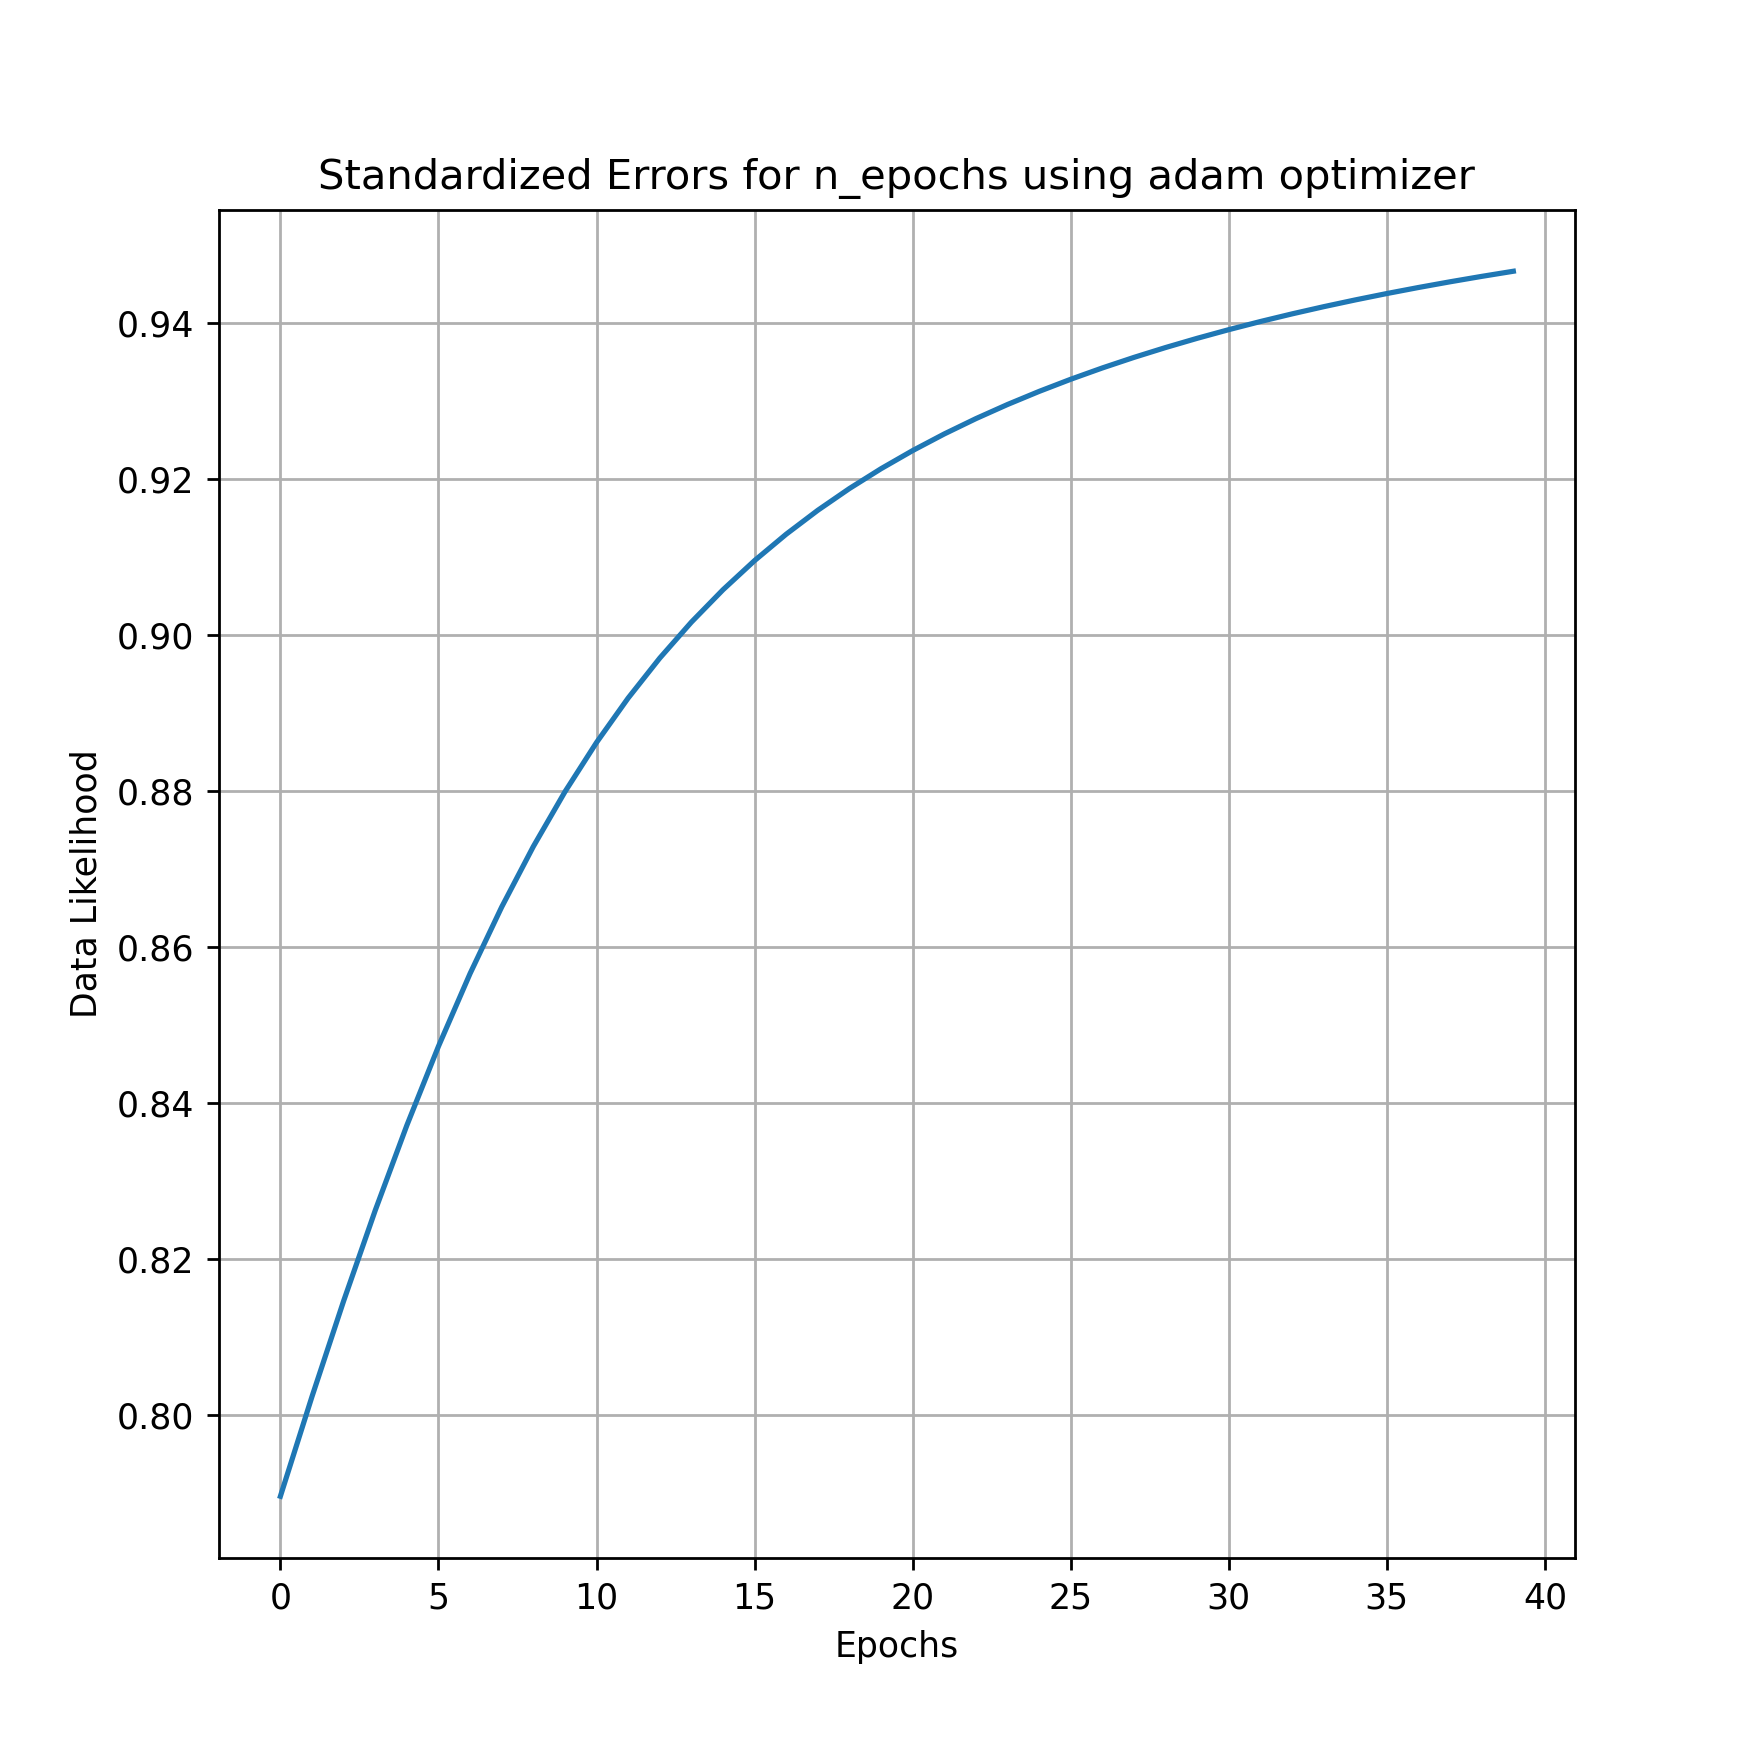

In [69]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using adam optimizer');

In [70]:
print(nnet)

NeuralNetwork(784, [], 10)
 Trained for 40 epochs.
 Final standardized training error 0.9466.


In [71]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[86.066, 87.44, 86.83]

In [72]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


In [73]:
nnet = nn.NeuralNetworkClassifier(784, [25], 10)
nnet.train(Xtrain, Ttrain, n_epochs=80, method='adam', learning_rate=0.001)

Adam: Epoch 8 ObjectiveF=0.81342
Adam: Epoch 16 ObjectiveF=0.83151
Adam: Epoch 24 ObjectiveF=0.84695
Adam: Epoch 32 ObjectiveF=0.86024
Adam: Epoch 40 ObjectiveF=0.87212
Adam: Epoch 48 ObjectiveF=0.88278
Adam: Epoch 56 ObjectiveF=0.89232
Adam: Epoch 64 ObjectiveF=0.90081
Adam: Epoch 72 ObjectiveF=0.90838
Adam: Epoch 80 ObjectiveF=0.91509


NeuralNetwork(784, [25], 10)

<IPython.core.display.Javascript object>


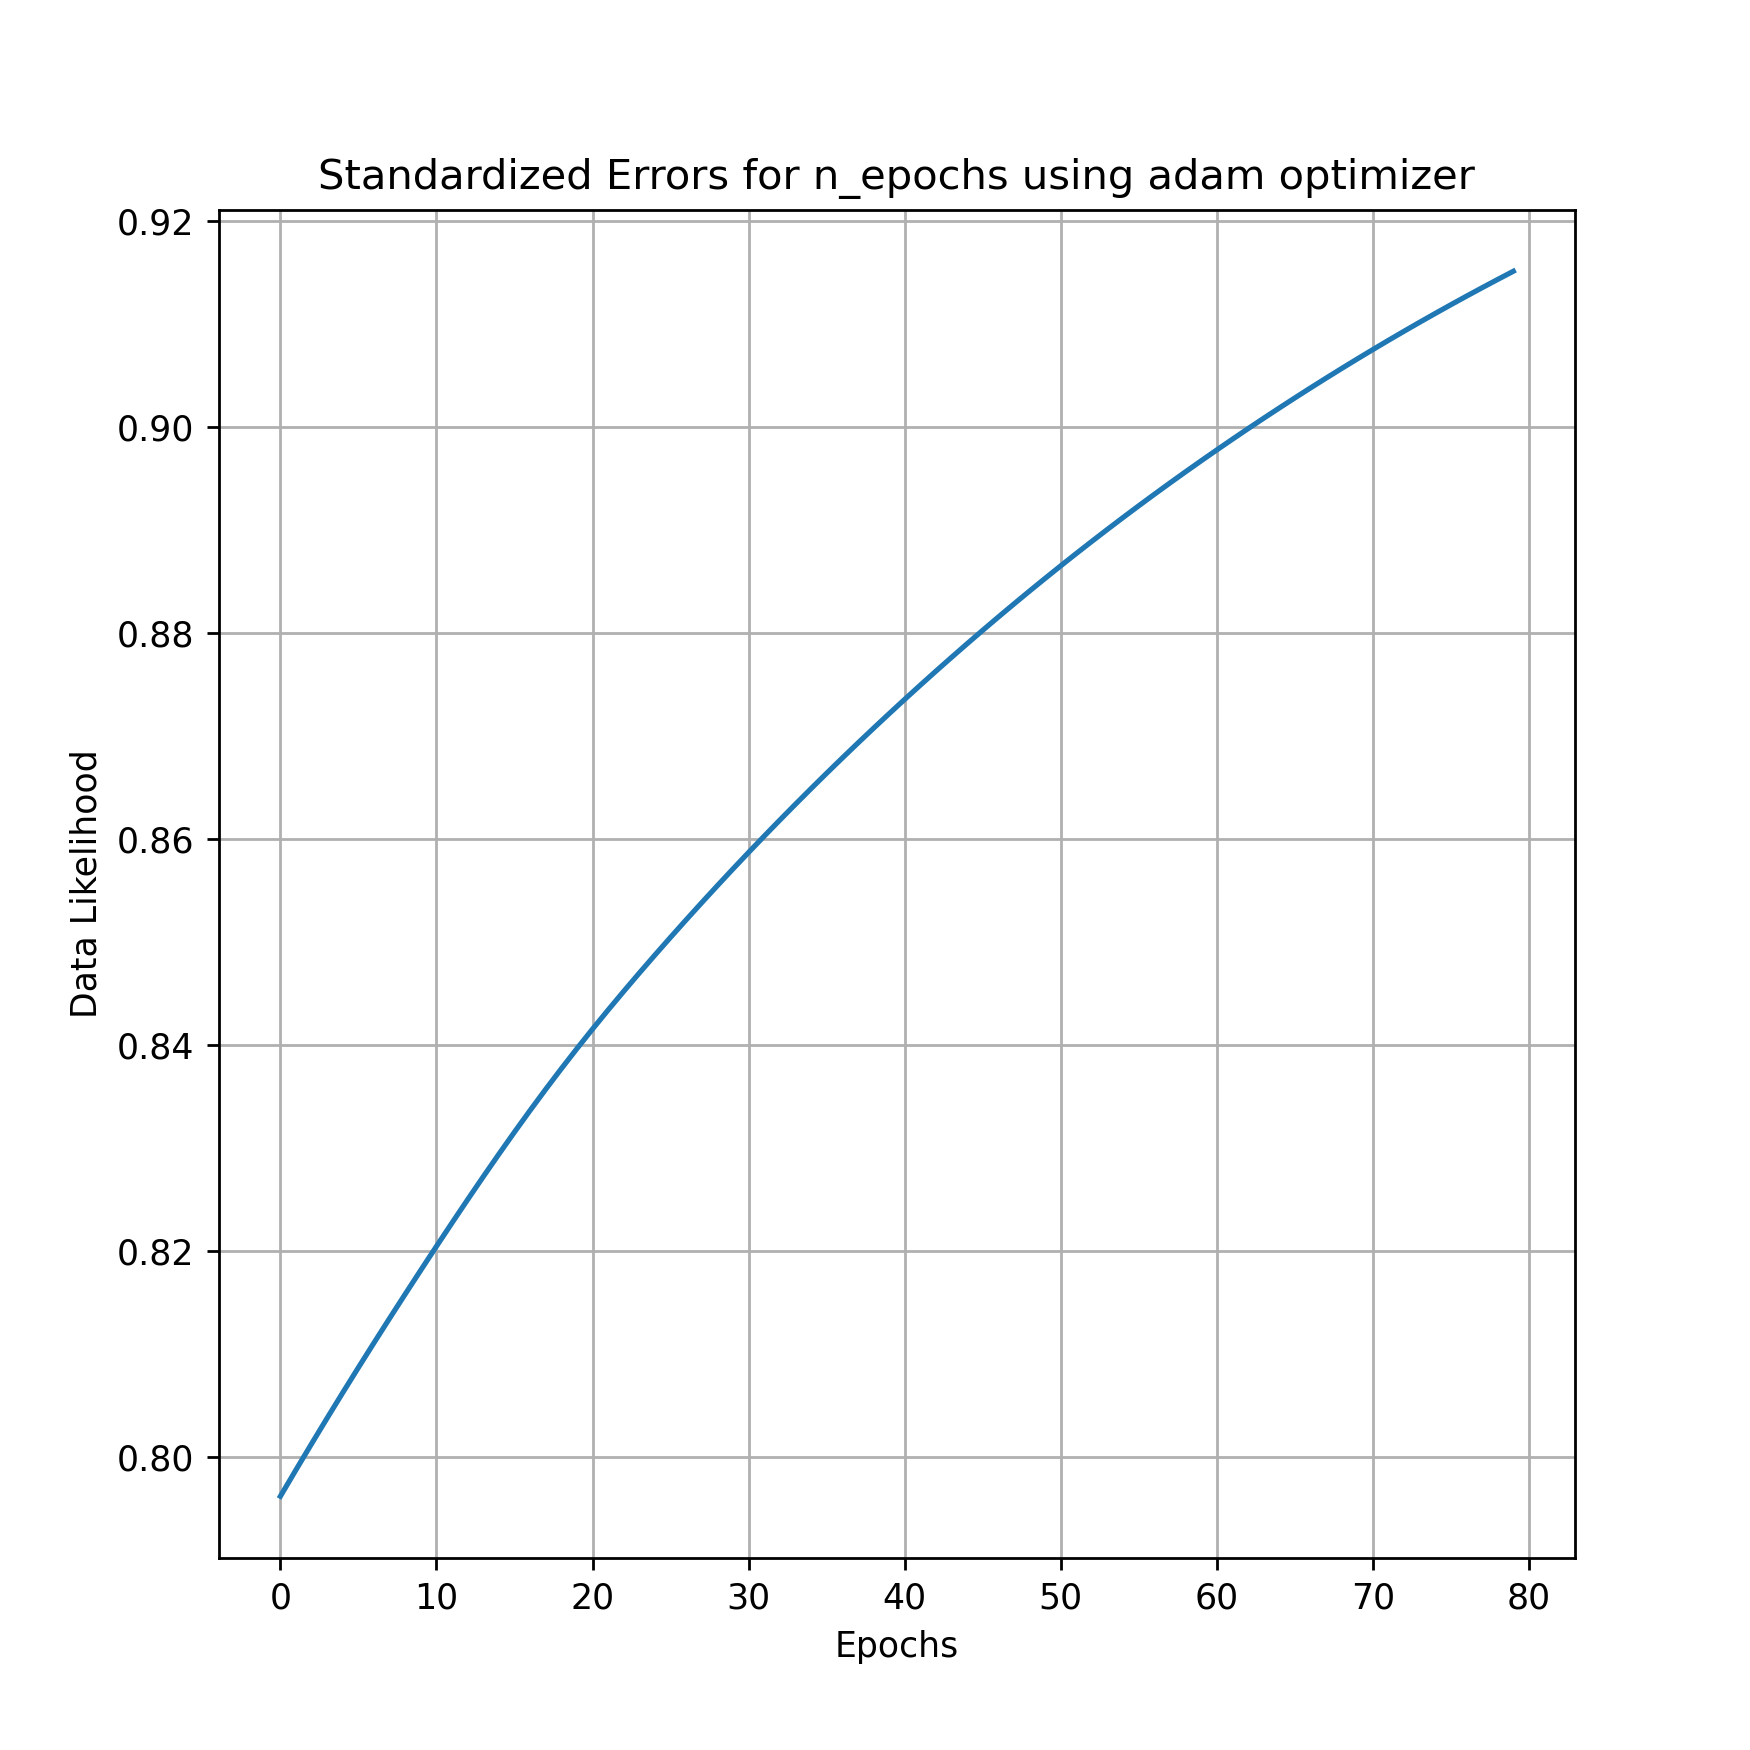

In [74]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using adam optimizer');

In [75]:
print(nnet)

NeuralNetwork(784, [25], 10)
 Trained for 80 epochs.
 Final standardized training error 0.9151.


In [76]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[86.142, 87.42999999999999, 86.50999999999999]

In [77]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


In [78]:
nnet = nn.NeuralNetworkClassifier(784, [100,100], 10)
nnet.train(Xtrain, Ttrain, n_epochs=60, method='adam', learning_rate=0.001)

Adam: Epoch 6 ObjectiveF=0.80189
Adam: Epoch 12 ObjectiveF=0.81283
Adam: Epoch 18 ObjectiveF=0.82184
Adam: Epoch 24 ObjectiveF=0.83162
Adam: Epoch 30 ObjectiveF=0.84600
Adam: Epoch 36 ObjectiveF=0.86768
Adam: Epoch 42 ObjectiveF=0.88947
Adam: Epoch 48 ObjectiveF=0.90788
Adam: Epoch 54 ObjectiveF=0.92378
Adam: Epoch 60 ObjectiveF=0.93625


NeuralNetwork(784, [100, 100], 10)

<IPython.core.display.Javascript object>


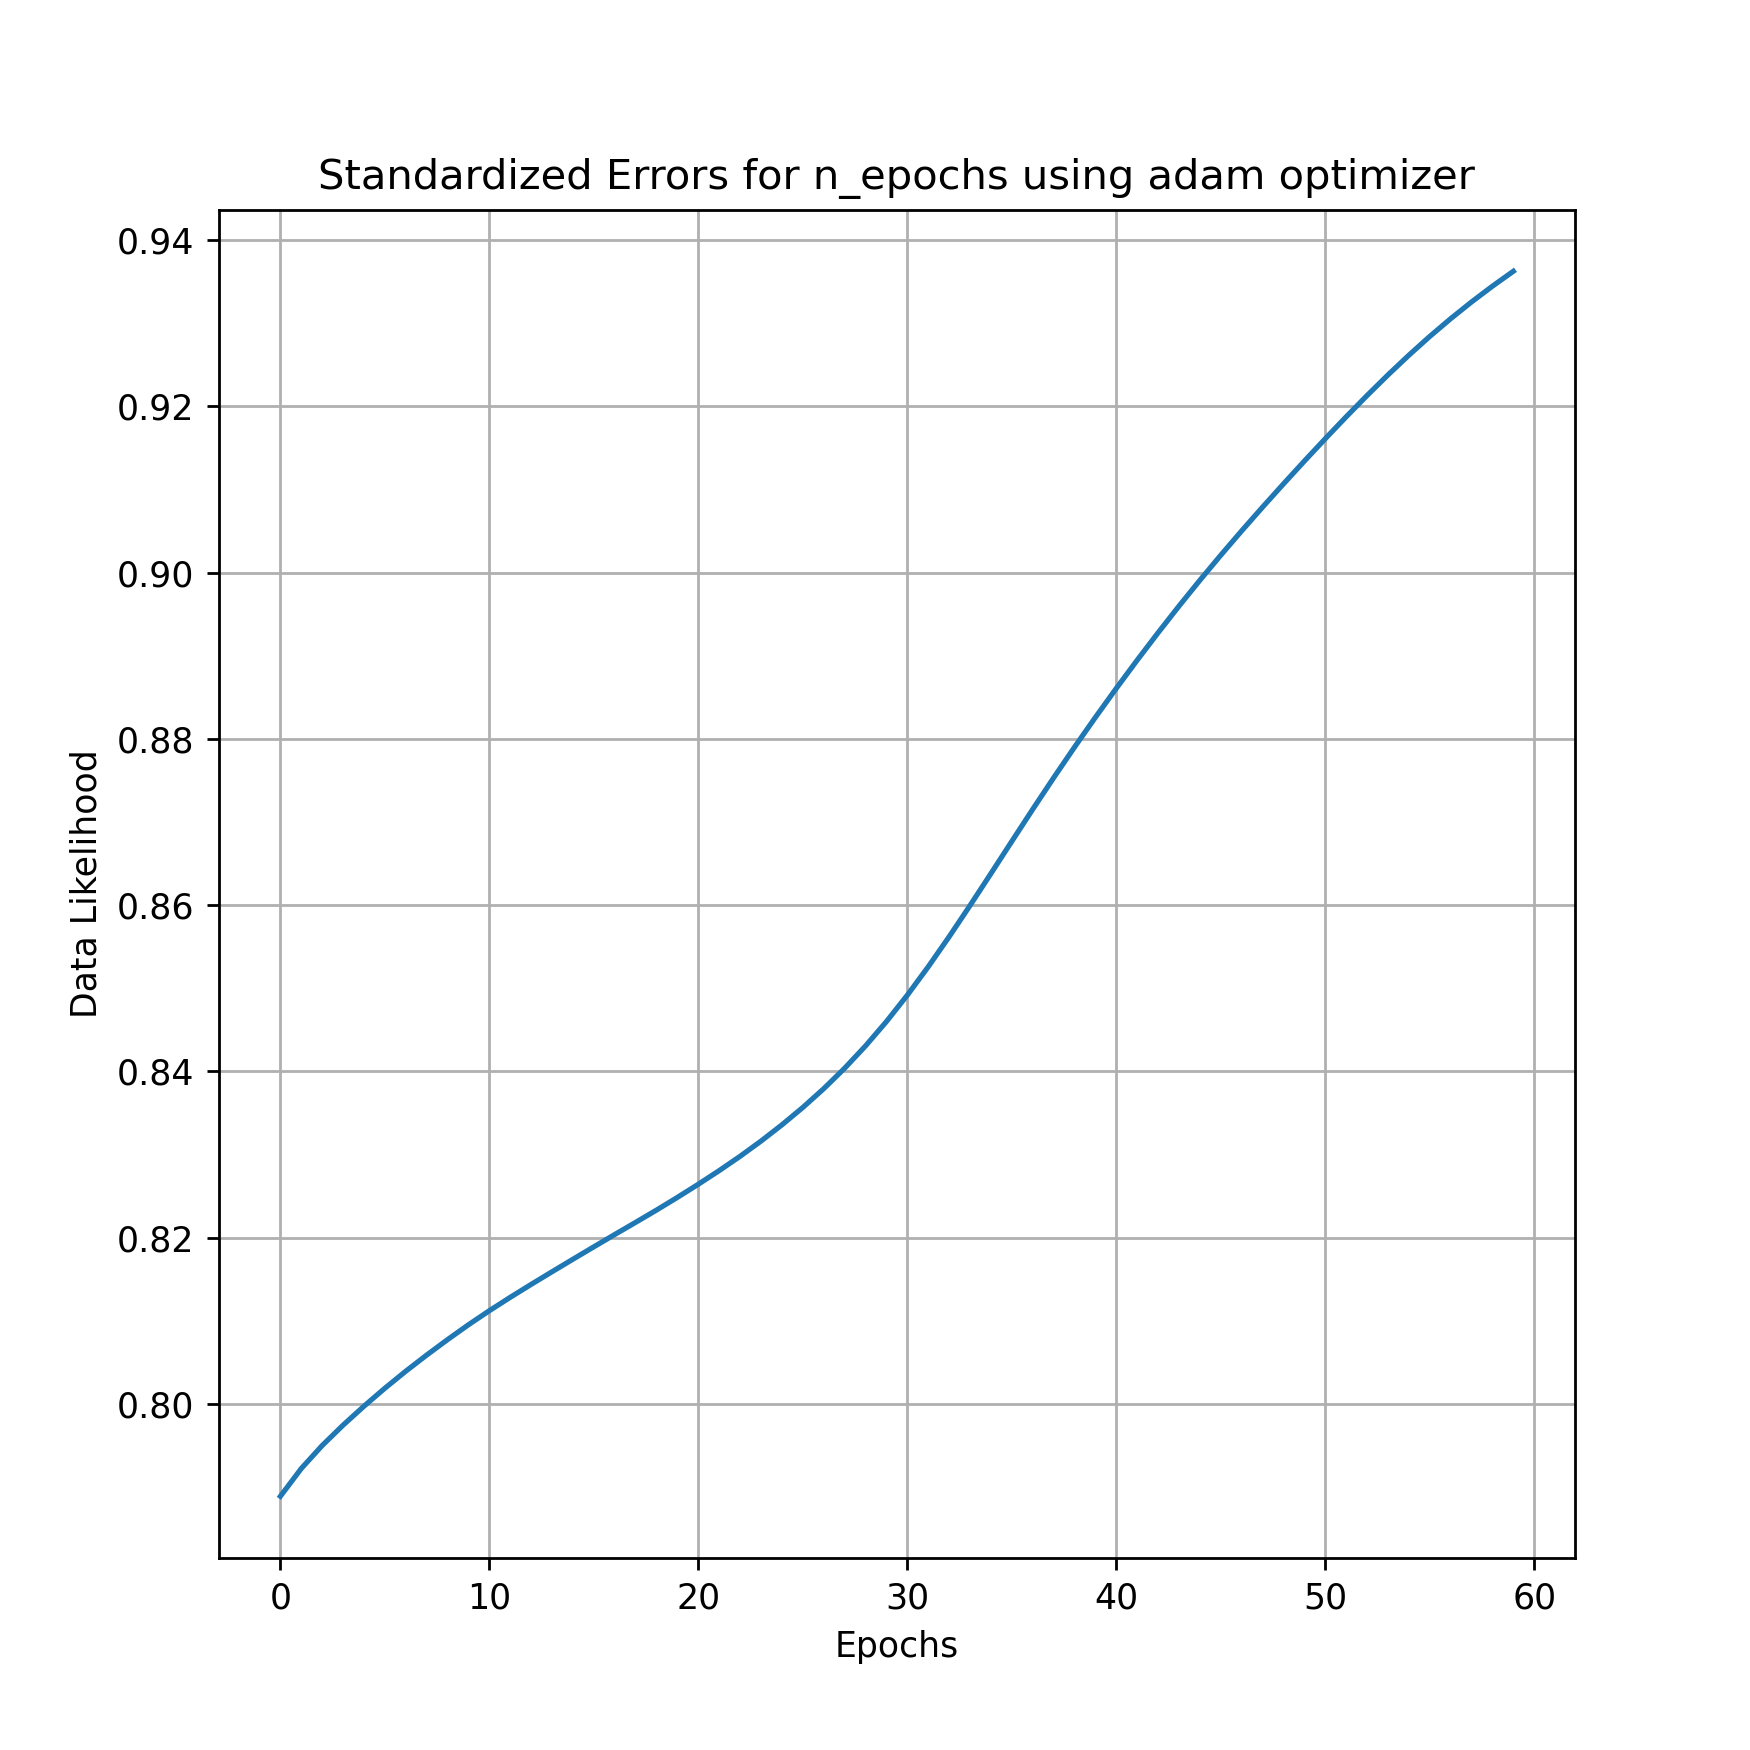

In [79]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using adam optimizer');

In [80]:
print(nnet)

NeuralNetwork(784, [100, 100], 10)
 Trained for 60 epochs.
 Final standardized training error 0.9362.


In [81]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[82.45, 83.65, 82.62]

In [82]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


In [83]:
nnet = nn.NeuralNetworkClassifier(784, [50,50,50], 10)
nnet.train(Xtrain, Ttrain, n_epochs=50, method='adam', learning_rate=0.001)

Adam: Epoch 5 ObjectiveF=0.79772
Adam: Epoch 10 ObjectiveF=0.80570
Adam: Epoch 15 ObjectiveF=0.81277
Adam: Epoch 20 ObjectiveF=0.81834
Adam: Epoch 25 ObjectiveF=0.82236
Adam: Epoch 30 ObjectiveF=0.82464
Adam: Epoch 35 ObjectiveF=0.82664
Adam: Epoch 40 ObjectiveF=0.82887
Adam: Epoch 45 ObjectiveF=0.83156
Adam: Epoch 50 ObjectiveF=0.83494


NeuralNetwork(784, [50, 50, 50], 10)

<IPython.core.display.Javascript object>


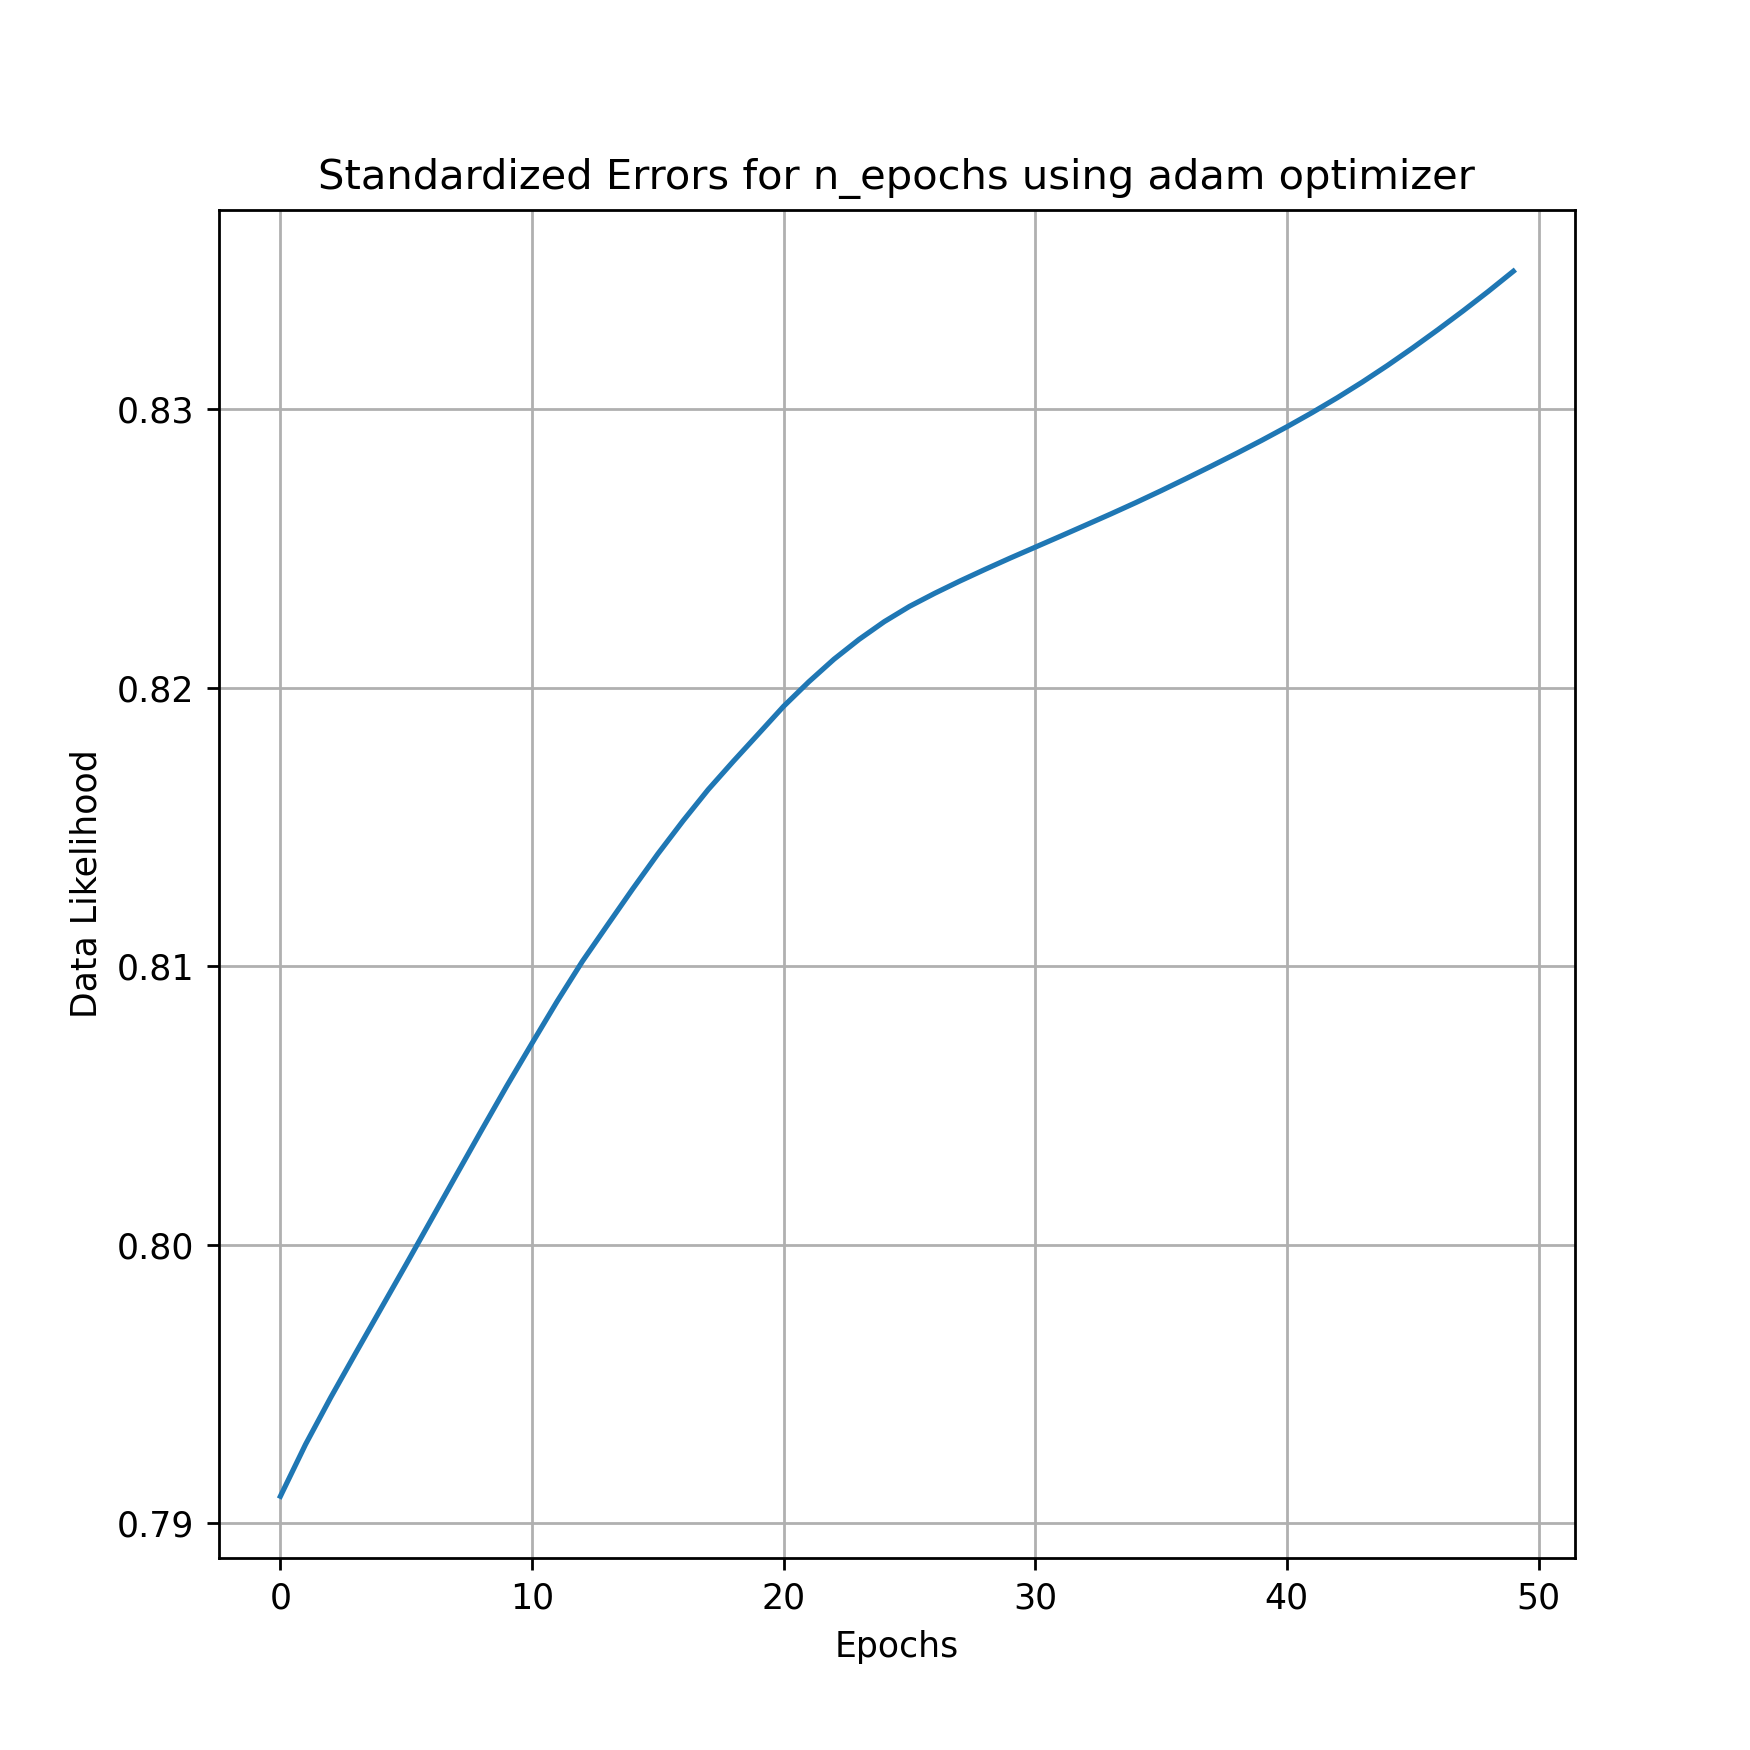

In [84]:
plt.figure(figsize=(7,7))
plt.plot(nnet.get_error_trace())
plt.xlabel('Epochs')
plt.ylabel('Data Likelihood')
plt.grid()
plt.title('Standardized Errors for n_epochs using adam optimizer');

In [85]:
print(nnet)

NeuralNetwork(784, [50, 50, 50], 10)
 Trained for 50 epochs.
 Final standardized training error 0.8349.


In [86]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[26.796, 26.650000000000002, 25.91]

In [87]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


## Observations:

1) The experiments are carried out on the MNIST digits dataset to explore the classification of data in neural networks.

2) From the graphs it is evident that with the increase in number of hidden layers the train, validation and test accuracies decreases, and there by increasing the standardized error rates.

3) When the learning rate is high, network model learn more, but it's important to choose carefully because it may also overrun. As a result, the neural network classifier must determine the optimal learning rate that meets the network model.

4) If the number of epochs in ADAM is increased, the likelihood error value drops. From the graph, we can comprehend that that the best fit of a network model would be attainable with fewer iterations and a lower learning rate.

5) While using SGD optimizer it seems that the likehood error value reduces as the number of epochs value increases. In this case, the best fit for the network model would be attained for less number of epochs with low learning rate.

6) As the SCG optimizer does not require a learning rate, we can better fit for the network model for reducend number of epochs. Hence, we can understand from the graph that the number of epochs is not proportional to the fitted value, thus a lower number of epoch is desirable for the best fit.

7) The confusion matrix is used for identifying the best train, validation and test accuracies, where the rows correspond to the predicted class (Output Class) and the columns correspond to the true class (Target Class).

8) The best train, validation and test accuracies are obtained when using the SCG optimizer.

9) The worst train, validation and test accuracies are obtained when using the SGD optimizer.

10) An acceptable level of train, validation and test accuracies are obtained when using the SGD optimizer.

# Grading

Download [A3grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A3grader.tar), extract `A3grader.py` before running the following cell.

In [88]:
%run -i A3grader.py


======================= Code Execution =======================

More than one ipynb file found: ['Jaya-A3.ipynb', 'Raveendiran-A3.ipynb']. Using first one.
Extracting python code from notebook named 'Jaya-A3.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

## Testing inheritance ####################################################################

    correct = issubclass(NeuralNetworkClassifier, NeuralNetwork)


--- 10/10 points. NeuralNetworkClassifier correctly extends NeuralNetwork.

## Testing inheritance ####################################################################

    import inspect
    forward_func = [f for f in inspect.classify_class_attrs(NeuralNetworkClassifier) if (f.name == 'forward' or f.name == '_forward')]
    correct = forward_func[0].defining_class == NeuralNetwork


--- 5/5 points. NeuralNetworkClassifier forward function correctly inherited from NeuralNetwork.

## Testing inheritance ##

# Extra Credit

Repeat the above experiments with a different data set.  Randonly partition your data into training, validaton and test parts if not already provided.  Write in markdown cells descriptions of the data and your results.